# Online Retail Data Clustering - RFM (Recency, Frequency, Monetary) - CLV (Customer Lifetime Value) 

## Purpose of the Project
The primary goal of this project is to analyze online retail transaction data to identify distinct customer segments using RFM analysis. By understanding customer behaviors in terms of recency, frequency, and monetary value, businesses can calculate Customer Lifetime Value (CLV) and develop targeted marketing strategies to enhance customer retention and profitability.

## Details on the dataset

### Data got from UC Irvine Machine learning repository
https://archive.ics.uci.edu/dataset/502/online+retail+ii

Online Retail II

Donated on 9/20/2019

A real online retail transaction data set of two years.

Dataset Characteristics: Multivariate, Sequential, Time-Series, Text

Subject Area: Business

Associated Tasks: Classification, Regression, Clustering

Feature Type: Integer, Real


#### Additional Dataset Information 

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

#### Additional Variable Information

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 

Description: Product (item) name. Nominal. 

Quantity: The quantities of each product (item) per transaction. Numeric.	

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. 

UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). 

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 

Country: Country name. Nominal. The name of the country where a customer resides.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

# Data Exploration

In [2]:
df = pd.read_excel("online_retail_II.xlsx", sheet_name=0)

df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate                Price          Customer ID  \
0      2009-12-01 07:45:00                 6.95             13085.00   
1      2009-12-01 07:45:00                 6.75             13085.00   
2      2009-12-01 07:45:00                 6.75             13085.00   
3      2009-12-01 07:45:00                 2.10             13085.00   
4      2009-12-01 07:45:00                 1.25             13085.00   
...                    ...                  ...                  ...   
525456 2010-12-09 20:01:00                 2.95             17530.00   
525457 2010-12-09 20:01:00                 3.75             17530.00   
525458 2010-12-09 20:01:00                 3.75             17530.00   
525459 2010-12-09 20:01:00                 3.75             17530.00   
525460 2010-12-09 20:01:00                 1.95             17530.00   

               Country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
525456  United Kingdom  
525457  United Kingdom  
525458  United Kingdom  
525459  United Kingdom  
525460  United Kingdom  

[525461 rows x 8 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe()

Quantity                Price          Customer ID
count            525461.00            525461.00            417534.00
mean                 10.34                 4.69             15360.65
std                 107.42               146.13              1680.81
min               -9600.00            -53594.36             12346.00
25%                   1.00                 1.25             13983.00
50%                   3.00                 2.10             15311.00
75%                  10.00                 4.21             16799.00
max               19152.00             25111.09             18287.00

In [5]:
df.describe(include='O')

Invoice StockCode                         Description         Country
count    525461    525461                              522533          525461
unique    28816      4632                                4681              40
top      537434    85123A  WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom
freq        675      3516                                3549          485852

In [6]:
df[df["Customer ID"].isna()].head(10)


Invoice StockCode                   Description  Quantity  \
263   489464     21733                  85123a mixed       -96   
283   489463     71477                         short      -240   
284   489467    85123A                   21733 mixed      -192   
470   489521     21646                           NaN       -50   
577   489525    85226C     BLUE PULL BACK RACING CAR         1   
578   489525     85227   SET/6 3D KIT CARDS FOR KIDS         1   
1055  489548     22271          FELTCRAFT DOLL ROSIE         1   
1056  489548     22254          FELT TOADSTOOL LARGE        12   
1057  489548     22273          FELTCRAFT DOLL MOLLY         3   
1058  489548     22195  LARGE HEART MEASURING SPOONS         1   

             InvoiceDate                Price  Customer ID         Country  
263  2009-12-01 10:52:00                 0.00          NaN  United Kingdom  
283  2009-12-01 10:52:00                 0.00          NaN  United Kingdom  
284  2009-12-01 10:53:00                 0.00          NaN  United Kingdom  
470  2009-12-01 11:44:00                 0.00          NaN  United Kingdom  
577  2009-12-01 11:49:00                 0.55          NaN  United Kingdom  
578  2009-12-01 11:49:00                 0.85          NaN  United Kingdom  
1055 2009-12-01 12:32:00                 2.95          NaN  United Kingdom  
1056 2009-12-01 12:32:00                 1.25          NaN  United Kingdom  
1057 2009-12-01 12:32:00                 2.95          NaN  United Kingdom  
1058 2009-12-01 12:32:00                 1.65          NaN  United Kingdom

In [7]:
df[df['Quantity'] < 0].head(10)

Invoice StockCode                        Description  Quantity  \
178  C489449     22087           PAPER BUNTING WHITE LACE       -12   
179  C489449    85206A       CREAM FELT EASTER EGG BASKET        -6   
180  C489449     21895      POTTING SHED SOW 'N' GROW SET        -4   
181  C489449     21896                 POTTING SHED TWINE        -6   
182  C489449     22083         PAPER CHAIN KIT RETRO SPOT       -12   
183  C489449     21871                SAVE THE PLANET MUG       -12   
184  C489449     84946    ANTIQUE SILVER TEA GLASS ETCHED       -12   
185  C489449    84970S  HANGING HEART ZINC T-LIGHT HOLDER       -24   
186  C489449     22090          PAPER BUNTING RETRO SPOTS       -12   
196  C489459    90200A         PURPLE SWEETHEART BRACELET        -3   

            InvoiceDate                Price          Customer ID  \
178 2009-12-01 10:33:00                 2.95             16321.00   
179 2009-12-01 10:33:00                 1.65             16321.00   
180 2009-12-01 10:33:00                 4.25             16321.00   
181 2009-12-01 10:33:00                 2.10             16321.00   
182 2009-12-01 10:33:00                 2.95             16321.00   
183 2009-12-01 10:33:00                 1.25             16321.00   
184 2009-12-01 10:33:00                 1.25             16321.00   
185 2009-12-01 10:33:00                 0.85             16321.00   
186 2009-12-01 10:33:00                 2.95             16321.00   
196 2009-12-01 10:44:00                 4.25             17592.00   

            Country  
178       Australia  
179       Australia  
180       Australia  
181       Australia  
182       Australia  
183       Australia  
184       Australia  
185       Australia  
186       Australia  
196  United Kingdom

In [8]:
# Checking to see if invoice has anything other than 6 digit number or starting with C which is cancellation
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

Invoice StockCode                       Description  Quantity  \
178     C489449     22087          PAPER BUNTING WHITE LACE       -12   
179     C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180     C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181     C489449     21896                POTTING SHED TWINE        -6   
182     C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...         ...       ...                               ...       ...   
524695  C538123     22956          36 FOIL HEART CAKE CASES        -2   
524696  C538124         M                            Manual        -4   
524697  C538124     22699  ROSES REGENCY TEACUP AND SAUCER         -1   
524698  C538124     22423          REGENCY CAKESTAND 3 TIER        -1   
525282  C538164    35004B       SET OF 3 BLACK FLYING DUCKS        -1   

               InvoiceDate                Price          Customer ID  \
178    2009-12-01 10:33:00                 2.95             16321.00   
179    2009-12-01 10:33:00                 1.65             16321.00   
180    2009-12-01 10:33:00                 4.25             16321.00   
181    2009-12-01 10:33:00                 2.10             16321.00   
182    2009-12-01 10:33:00                 2.95             16321.00   
...                    ...                  ...                  ...   
524695 2010-12-09 15:41:00                 2.10             12605.00   
524696 2010-12-09 15:43:00                 0.50             15329.00   
524697 2010-12-09 15:43:00                 2.95             15329.00   
524698 2010-12-09 15:43:00                12.75             15329.00   
525282 2010-12-09 17:32:00                 1.95             14031.00   

               Country  
178          Australia  
179          Australia  
180          Australia  
181          Australia  
182          Australia  
...                ...  
524695         Germany  
524696  United Kingdom  
524697  United Kingdom  
524698  United Kingdom  
525282  United Kingdom  

[10209 rows x 8 columns]

In [9]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [10]:
df[df["Invoice"].str.startswith("A")]

Invoice StockCode      Description  Quantity         InvoiceDate  \
179403  A506401         B  Adjust bad debt         1 2010-04-29 13:36:00   
276274  A516228         B  Adjust bad debt         1 2010-07-19 11:24:00   
403472  A528059         B  Adjust bad debt         1 2010-10-20 12:04:00   

                      Price  Customer ID         Country  
179403            -53594.36          NaN  United Kingdom  
276274            -44031.79          NaN  United Kingdom  
403472            -38925.87          NaN  United Kingdom

In [11]:
# Looking at stock codes besides 5 digits and 5 digits with letter at the end
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [12]:
df[df["StockCode"].str.contains("^DOT")]


Invoice StockCode     Description  Quantity         InvoiceDate  \
2379    489597       DOT  DOTCOM POSTAGE         1 2009-12-01 14:28:00   
2539    489600       DOT  DOTCOM POSTAGE         1 2009-12-01 14:43:00   
2551    489601       DOT  DOTCOM POSTAGE         1 2009-12-01 14:44:00   
2571    489602       DOT  DOTCOM POSTAGE         1 2009-12-01 14:45:00   
2619    489603       DOT  DOTCOM POSTAGE         1 2009-12-01 14:46:00   
...        ...       ...             ...       ...                 ...   
524272  538071       DOT  DOTCOM POSTAGE         1 2010-12-09 14:09:00   
524887  538148       DOT  DOTCOM POSTAGE         1 2010-12-09 16:26:00   
525000  538149       DOT  DOTCOM POSTAGE         1 2010-12-09 16:27:00   
525126  538153       DOT  DOTCOM POSTAGE         1 2010-12-09 16:31:00   
525147  538154       DOT  DOTCOM POSTAGE         1 2010-12-09 16:35:00   

                      Price  Customer ID         Country  
2379                 647.19          NaN  United Kingdom  
2539                  55.96          NaN  United Kingdom  
2551                  68.39          NaN  United Kingdom  
2571                  59.35          NaN  United Kingdom  
2619                  42.39          NaN  United Kingdom  
...                     ...          ...             ...  
524272               885.94          NaN  United Kingdom  
524887               547.32          NaN  United Kingdom  
525000               620.68          NaN  United Kingdom  
525126               822.94          NaN  United Kingdom  
525147                85.79          NaN  United Kingdom  

[736 rows x 8 columns]

#### Going through each of the different stock codes not following the information schema:

StockCode is meant to follow the pattern [0-9]{5} but seems to have legit values for [0-9]{5}[a-zA-Z]+

Also contains other values:


| Code                | Description                                                                                              | Action              |
|---------------------|----------------------------------------------------------------------------------------------------------|---------------------|
| DCGS                | Looks valid, some quantities are negative though and customer ID is null                               | Exclude from clustering |
| D                   | Looks valid, represents discount values                                                                 | Exclude from clustering |
| DOT                 | Looks valid, represents postage charges                                                                 | Exclude from clustering |
| M or m              | Looks valid, represents manual transactions                                                             | Exclude from clustering |
| C2                  | Carriage transaction - not sure what this means                                                          | Exclude from clustering |
| C3                  | Not sure, only 1 transaction                                                                            | Exclude             |
| BANK CHARGES or B   | Bank charges                                                                                           | Exclude from clustering |
| S                   | Samples sent to customer                                                                               | Exclude from clustering |
| TESTXXX             | Testing data, not valid                                                                                  | Exclude from clustering |
| gift__XXX           | Purchases with gift cards, might be interesting for another analysis, but no customer data              | Exclude             |
| PADS                | Looks like a legit stock code for padding                                                                | Include             |
| SP1002              | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing                   | Exclude for now     |
| AMAZONFEE           | Looks like fees for Amazon shipping or something                                                         | Exclude for now     |
| ADJUSTX             | Looks like manual account adjustments by admins                                                          | Exclude for now     |





# Data Cleaning

In [13]:
cleaned_df = df.copy()


In [14]:
#Removing Invoices that have C and A
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate                Price          Customer ID  \
0      2009-12-01 07:45:00                 6.95             13085.00   
1      2009-12-01 07:45:00                 6.75             13085.00   
2      2009-12-01 07:45:00                 6.75             13085.00   
3      2009-12-01 07:45:00                 2.10             13085.00   
4      2009-12-01 07:45:00                 1.25             13085.00   
...                    ...                  ...                  ...   
525456 2010-12-09 20:01:00                 2.95             17530.00   
525457 2010-12-09 20:01:00                 3.75             17530.00   
525458 2010-12-09 20:01:00                 3.75             17530.00   
525459 2010-12-09 20:01:00                 3.75             17530.00   
525460 2010-12-09 20:01:00                 1.95             17530.00   

               Country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
525456  United Kingdom  
525457  United Kingdom  
525458  United Kingdom  
525459  United Kingdom  
525460  United Kingdom  

[515252 rows x 8 columns]

In [15]:
# Handling the stock codes as well

cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate                Price          Customer ID  \
0      2009-12-01 07:45:00                 6.95             13085.00   
1      2009-12-01 07:45:00                 6.75             13085.00   
2      2009-12-01 07:45:00                 6.75             13085.00   
3      2009-12-01 07:45:00                 2.10             13085.00   
4      2009-12-01 07:45:00                 1.25             13085.00   
...                    ...                  ...                  ...   
525456 2010-12-09 20:01:00                 2.95             17530.00   
525457 2010-12-09 20:01:00                 3.75             17530.00   
525458 2010-12-09 20:01:00                 3.75             17530.00   
525459 2010-12-09 20:01:00                 3.75             17530.00   
525460 2010-12-09 20:01:00                 1.95             17530.00   

               Country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
525456  United Kingdom  
525457  United Kingdom  
525458  United Kingdom  
525459  United Kingdom  
525460  United Kingdom  

[512796 rows x 8 columns]

In [16]:
#Dropping null values at CustomerID

cleaned_df.dropna(subset=["Customer ID"], inplace=True)


/var/folders/ng/411k2bk11d540st5s0w7gdch0000gn/T/ipykernel_98679/678658666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [17]:
#Dropping price where it is 0

cleaned_df = cleaned_df[cleaned_df["Price"] > 0.0]


In [18]:
cleaned_df.describe()


Quantity                Price          Customer ID
count            406309.00            406309.00            406309.00
mean                 13.62                 2.99             15373.72
std                  97.00                 4.29              1677.33
min                   1.00                 0.00             12346.00
25%                   2.00                 1.25             14006.00
50%                   5.00                 1.95             15326.00
75%                  12.00                 3.75             16814.00
max               19152.00               295.00             18287.00

In [19]:
cleaned_df["Price"].min()


0.001

In [20]:
len(cleaned_df)/len(df)

0.7732429238325965

# Feature Engineering

In [21]:
# We want to see Frequency , Recency and total spent by a customer 

In [22]:
# We want to also see total sales per line 

cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

/var/folders/ng/411k2bk11d540st5s0w7gdch0000gn/T/ipykernel_98679/2709291906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate                Price          Customer ID  \
0      2009-12-01 07:45:00                 6.95             13085.00   
1      2009-12-01 07:45:00                 6.75             13085.00   
2      2009-12-01 07:45:00                 6.75             13085.00   
3      2009-12-01 07:45:00                 2.10             13085.00   
4      2009-12-01 07:45:00                 1.25             13085.00   
...                    ...                  ...                  ...   
525456 2010-12-09 20:01:00                 2.95             17530.00   
525457 2010-12-09 20:01:00                 3.75             17530.00   
525458 2010-12-09 20:01:00                 3.75             17530.00   
525459 2010-12-09 20:01:00                 3.75             17530.00   
525460 2010-12-09 20:01:00                 1.95             17530.00   

               Country       SalesLineTotal  
0       United Kingdom                83.40  
1       United Kingdom                81.00  
2       United Kingdom                81.00  
3       United Kingdom               100.80  
4       United Kingdom                30.00  
...                ...                  ...  
525456  United Kingdom                 5.90  
525457  United Kingdom                 3.75  
525458  United Kingdom                 3.75  
525459  United Kingdom                 7.50  
525460  United Kingdom                 3.90  

[406309 rows x 9 columns]

In [23]:
cleaned_df.to_csv('cleaned_df.csv', index=False)

In [24]:
# we want to aggregate sales total for each customer and total number of invoices to see frequency of visists and latest invoice date to be max as it shows last visit

aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("SalesLineTotal", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_df.head(5)

Customer ID        MonetaryValue  Frequency     LastInvoiceDate
0             12346.00               169.36          2 2010-06-28 13:53:00
1             12347.00              1323.32          2 2010-12-07 14:57:00
2             12348.00               221.16          1 2010-09-27 14:59:00
3             12349.00              2221.14          2 2010-10-28 08:23:00
4             12351.00               300.93          1 2010-11-29 15:23:00

In [25]:
# we want to add recency, we can use latest lastinvoice date for that, in real case can use current date

max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

Customer ID        MonetaryValue  Frequency     LastInvoiceDate  \
0             12346.00               169.36          2 2010-06-28 13:53:00   
1             12347.00              1323.32          2 2010-12-07 14:57:00   
2             12348.00               221.16          1 2010-09-27 14:59:00   
3             12349.00              2221.14          2 2010-10-28 08:23:00   
4             12351.00               300.93          1 2010-11-29 15:23:00   

   Recency  
0      164  
1        2  
2       73  
3       42  
4       10

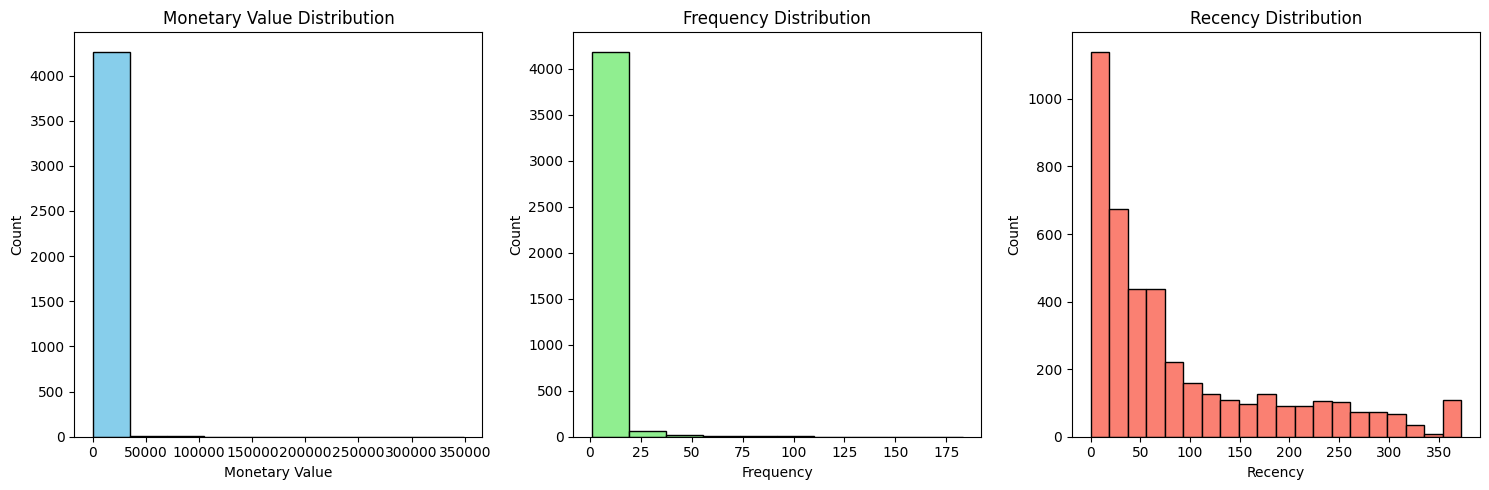

In [26]:
# We want to observe to se outliers, we can use bar graphs for it
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [27]:
# Monetary value and frequency appears to have outliers , but recency seems to be distributed okay 

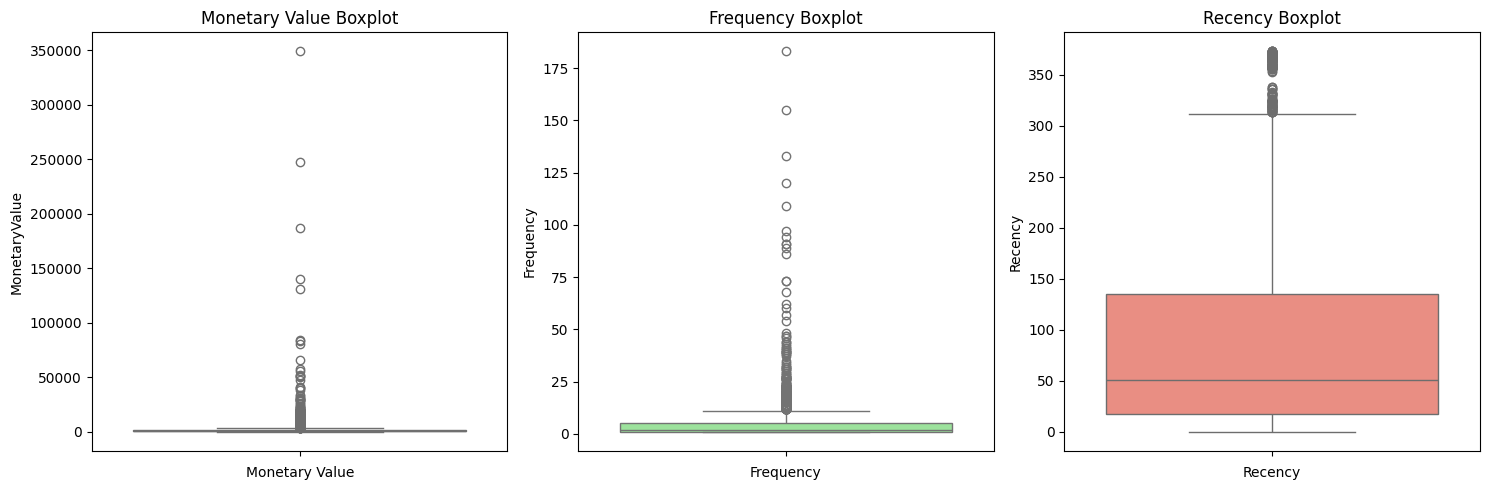

In [28]:
# We using box plot further to see more on the outliers

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [29]:
# appears to have outliers, so let's remove them using IQR

In [30]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

Customer ID        MonetaryValue            Frequency  \
count               423.00               423.00               423.00   
mean              15103.04             12188.10                17.17   
std                1728.66             25830.85                19.73   
min               12357.00              3802.04                 1.00   
25%               13622.00              4605.94                 8.00   
50%               14961.00              6191.32                12.00   
75%               16692.00             10273.24                18.00   
max               18260.00            349164.35               183.00   

                   Recency  
count               423.00  
mean                 30.04  
std                  51.54  
min                   0.00  
25%                   3.00  
50%                  13.00  
75%                  31.00  
max                 364.00

In [31]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

Customer ID        MonetaryValue            Frequency  \
count               279.00               279.00               279.00   
mean              15352.66             14409.71                23.81   
std                1748.43             31381.74                21.93   
min               12437.00              1094.39                12.00   
25%               13800.00              4331.56                13.00   
50%               15465.00              6615.77                17.00   
75%               16828.50             11692.41                23.00   
max               18260.00            349164.35               183.00   

                   Recency  
count               279.00  
mean                 16.09  
std                  26.59  
min                   0.00  
25%                   2.00  
50%                   7.00  
75%                  19.00  
max                 211.00

In [32]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

Customer ID        MonetaryValue            Frequency  \
count              3809.00              3809.00              3809.00   
mean              15376.48               885.50                 2.86   
std                1693.20               817.67                 2.24   
min               12346.00                 1.55                 1.00   
25%               13912.00               279.91                 1.00   
50%               15389.00               588.05                 2.00   
75%               16854.00              1269.05                 4.00   
max               18287.00              3788.21                11.00   

                   Recency  
count              3809.00  
mean                 97.08  
std                  98.11  
min                   0.00  
25%                  22.00  
50%                  58.00  
75%                 154.00  
max                 373.00

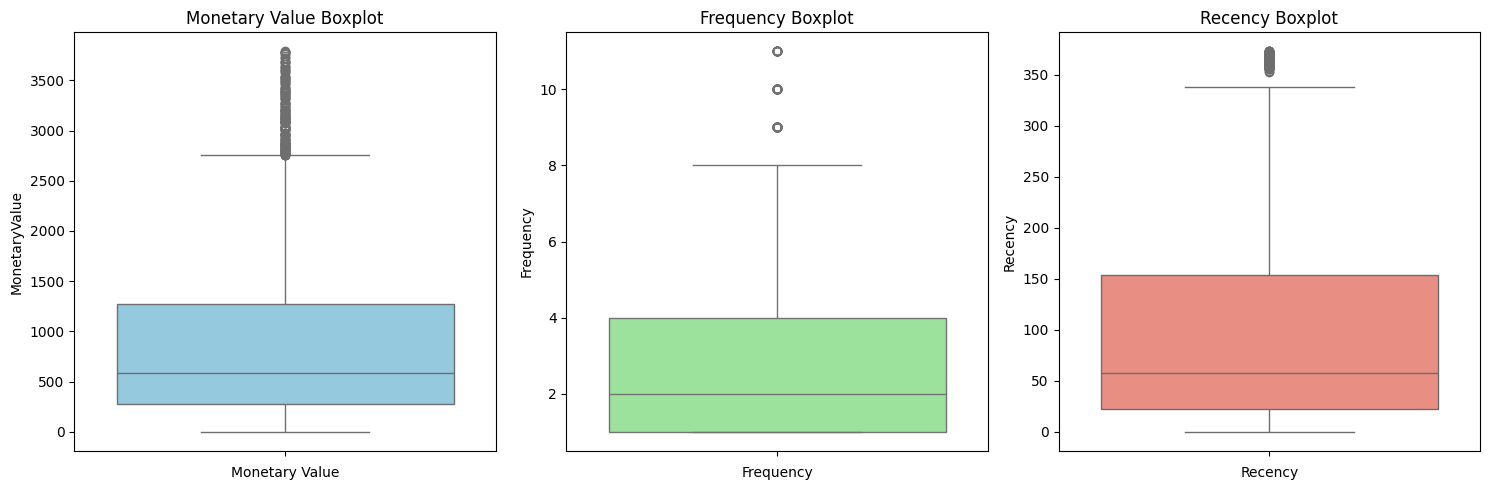

In [33]:
# Looking at plot after removing outliers and it seems okay

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()


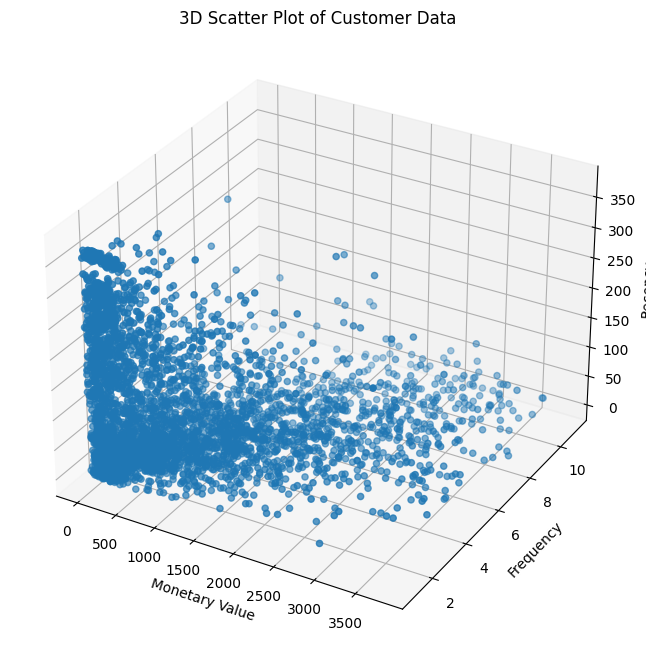

In [34]:
#looking at a 3-D plot

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [35]:
# since the values are in different metrics, we can use standard scalar to have a mean of 0 and std of 1 
# ensuring each feature contributes equally to the analysis

In [36]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [37]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

MonetaryValue            Frequency              Recency
0                   -0.88                -0.38                 0.68
1                    0.54                -0.38                -0.97
2                   -0.81                -0.83                -0.25
3                    1.63                -0.38                -0.56
4                   -0.72                -0.83                -0.89
...                   ...                  ...                  ...
4280                -0.30                 1.40                -0.82
4281                -0.58                -0.83                -0.32
4282                -0.62                -0.83                 2.02
4283                 0.44                -0.38                 0.14
4284                 1.72                 0.51                -0.82

[3809 rows x 3 columns]

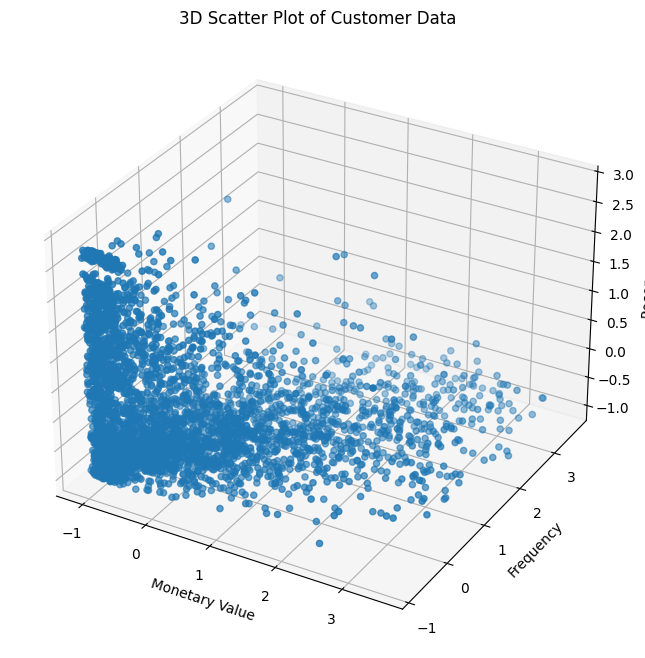

In [38]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

# K Means Clustering

/opt/anaconda3/envs/segmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/segmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/segmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/segmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

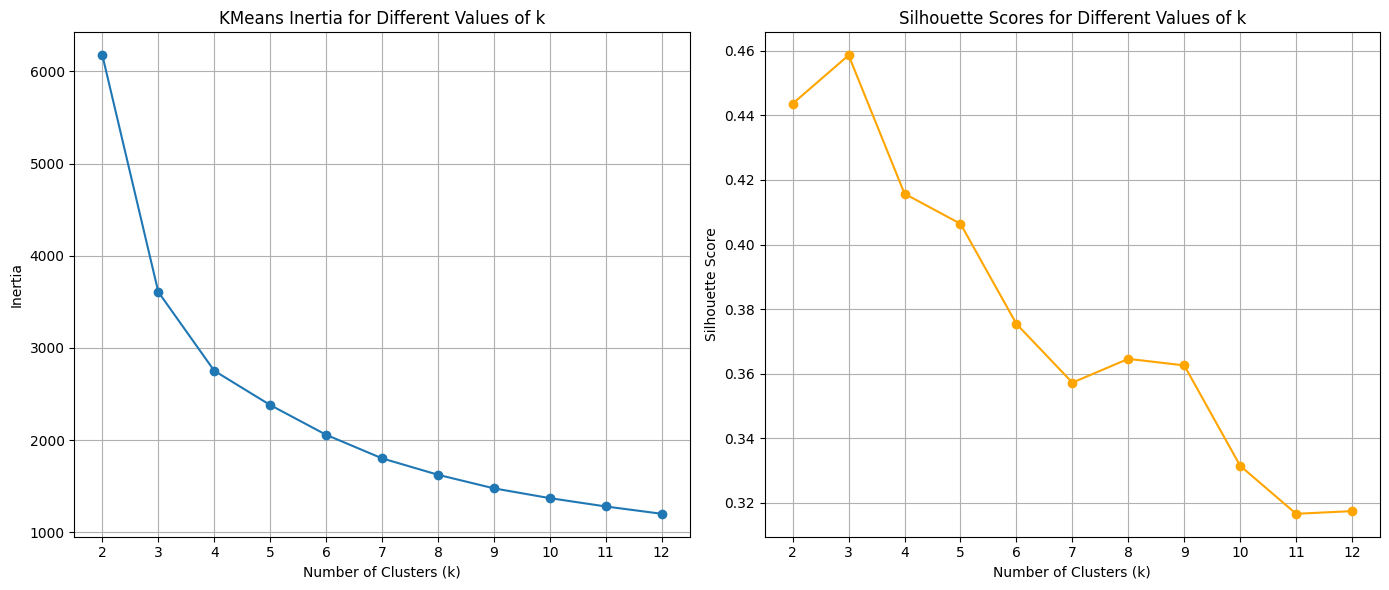

In [39]:
# Let us find ideal k using elbow method 

max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

Inertia is reduced the most at K = 4 and 5 after which there is less reduction in inertia. 
Thus, between 4 and 5, we can take k= 4 which has a higher silhoutee than k = 5.
The silhoutte score ranges between [-1,1] and a higher value indicates more distinct clusters.

In [40]:
# Calculating the clusters
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

/opt/anaconda3/envs/segmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 3, 2, ..., 0, 3, 3], dtype=int32)

In [41]:
# Adding the Clusters to the dataframe
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

/var/folders/ng/411k2bk11d540st5s0w7gdch0000gn/T/ipykernel_98679/4294060718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


Customer ID        MonetaryValue  Frequency     LastInvoiceDate  \
0                12346.00               169.36          2 2010-06-28 13:53:00   
1                12347.00              1323.32          2 2010-12-07 14:57:00   
2                12348.00               221.16          1 2010-09-27 14:59:00   
3                12349.00              2221.14          2 2010-10-28 08:23:00   
4                12351.00               300.93          1 2010-11-29 15:23:00   
...                   ...                  ...        ...                 ...   
4280             18283.00               641.77          6 2010-11-22 15:30:00   
4281             18284.00               411.68          1 2010-10-04 11:33:00   
4282             18285.00               377.00          1 2010-02-17 10:24:00   
4283             18286.00              1246.43          2 2010-08-20 11:57:00   
4284             18287.00              2295.71          4 2010-11-22 11:51:00   

      Recency  Cluster  
0         164        0  
1           2        3  
2          73        2  
3          42        3  
4          10        2  
...       ...      ...  
4280       17        3  
4281       66        2  
4282      295        0  
4283      111        3  
4284       17        3  

[3809 rows x 6 columns]

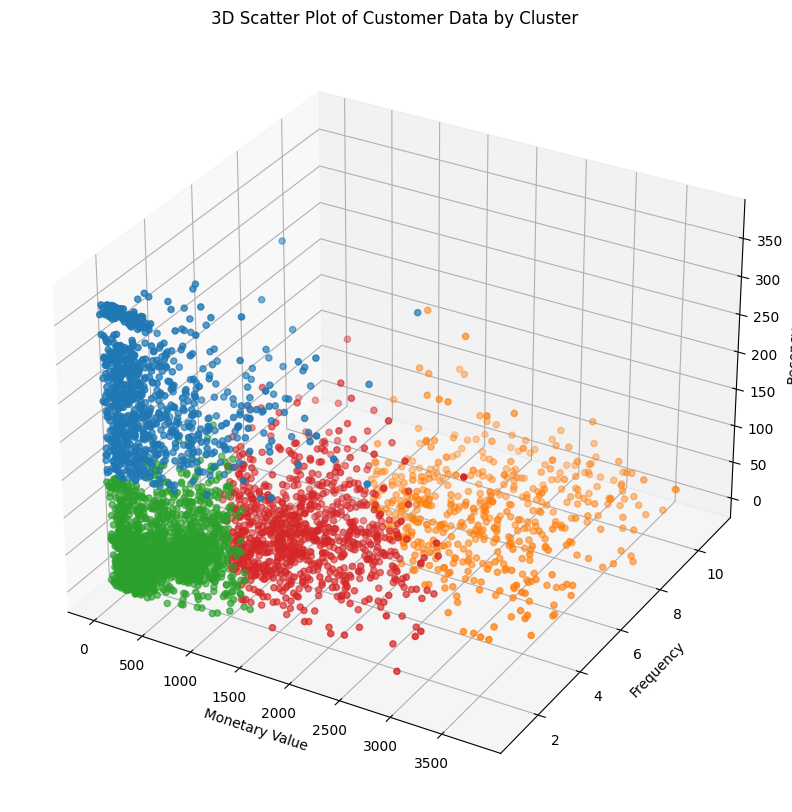

In [42]:
# We can then plot a 3-D plot with different colors for the clusters
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()


In [43]:
# It's great to see the various values of the cluster on the data, but we want to be more specific of our analysis, more rigourous analysis
# For that we can use a violin plot to take a look at the distributions across the features

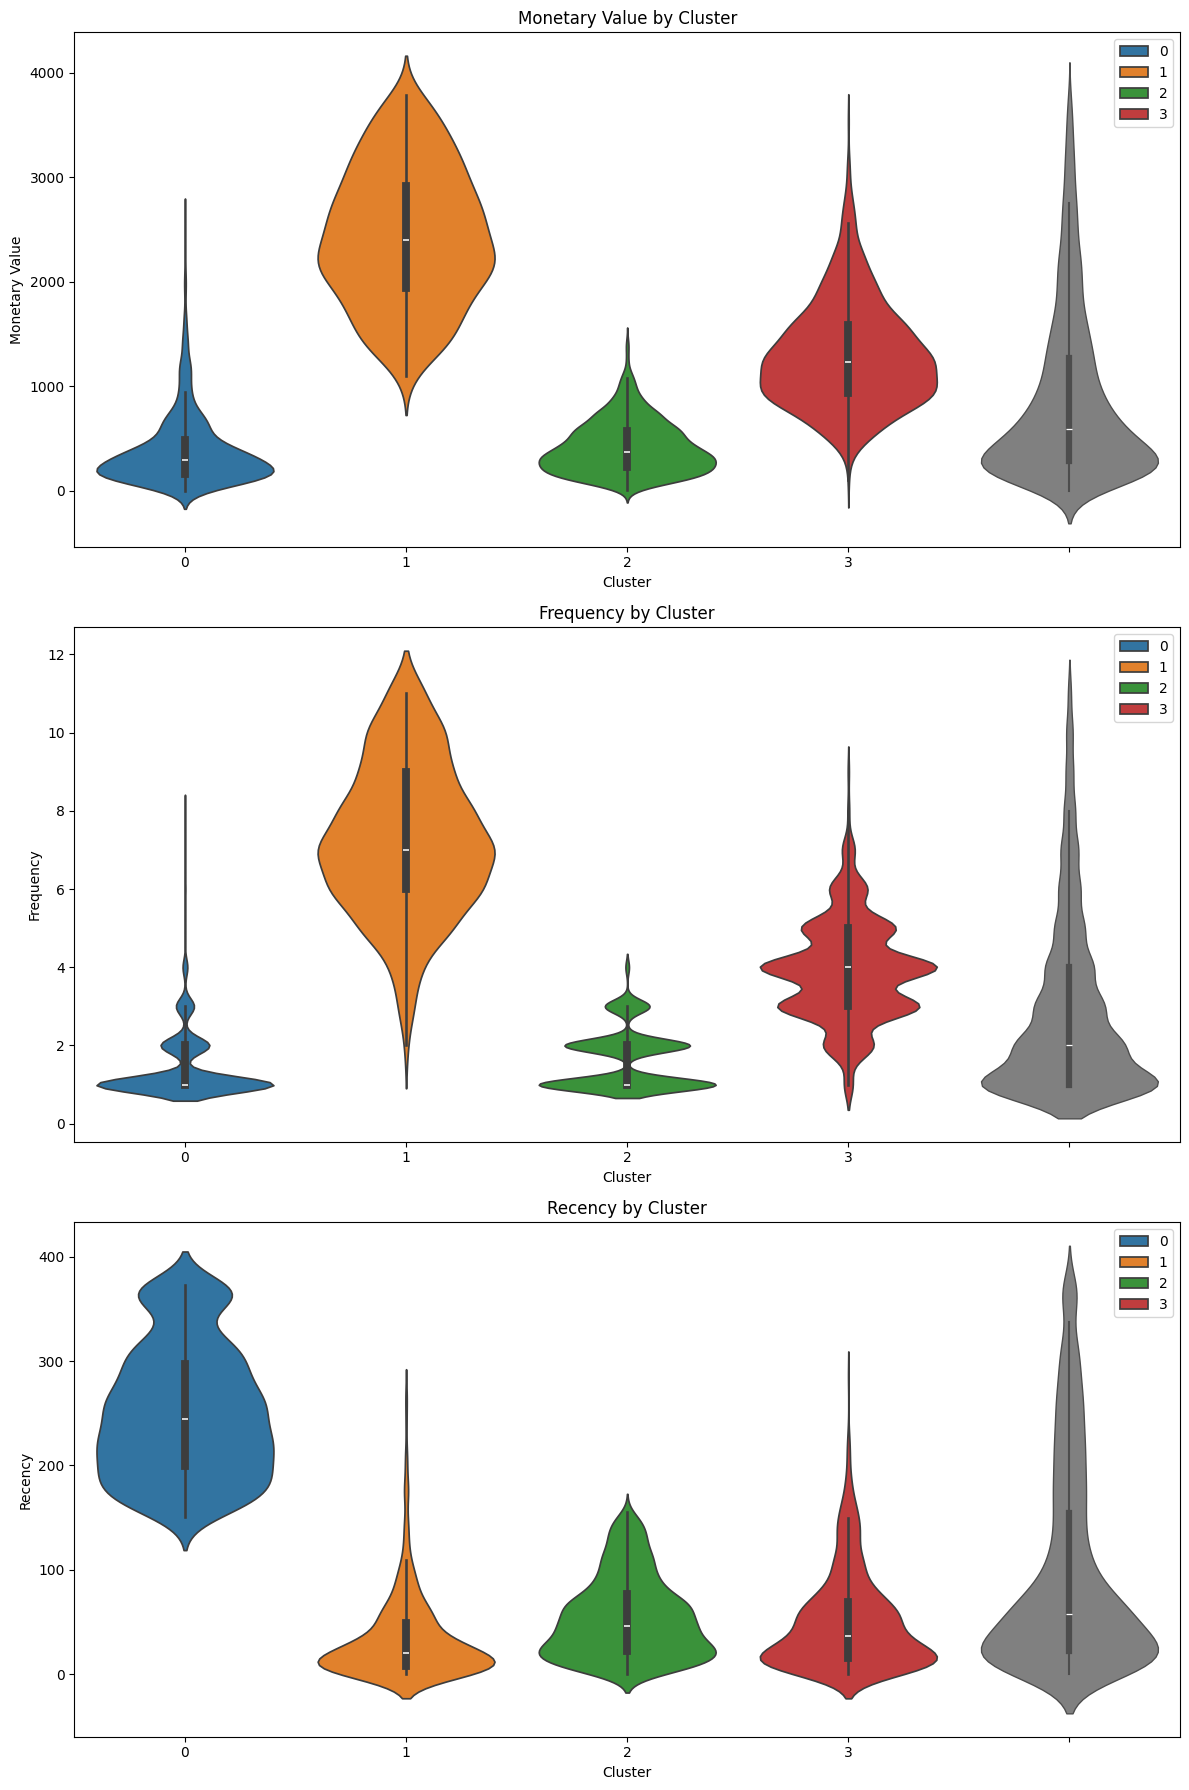

In [44]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

In [45]:
# The plots are good but we want to convert them into valuable insights and that is what we will be doing

### 1. Cluster 0 (Blue): "Retain"

Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.

Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

### 2. Cluster 1 (Orange): "Re-Engage"

Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.

Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

### 3. Cluster 2 (Green): "Nurture"

Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.

Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

### 4. Cluster 3 (Red): "Reward"

Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.

Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

### Summary of Cluster Names:

Cluster 0 (Blue): "Retain"

Cluster 1 (Orange): "Re-Engage"

Cluster 2 (Green): "Nurture"

Cluster 3 (Red): "Reward"

In [46]:
### We also need to do analysis on the outliers data as well

overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)

monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

Customer ID        MonetaryValue  Frequency     LastInvoiceDate  \
9                12357.00             11229.99          1 2010-11-16 10:05:00   
25               12380.00              4782.84          4 2010-08-31 14:54:00   
42               12409.00             12346.62          4 2010-10-15 10:24:00   
48               12415.00             19468.84          4 2010-11-29 15:07:00   
61               12431.00              4145.52         11 2010-12-01 10:03:00   
...                   ...                  ...        ...                 ...   
4235             18223.00              7516.31         12 2010-11-17 12:20:00   
4236             18225.00              7545.14         15 2010-12-09 15:46:00   
4237             18226.00              6650.83         15 2010-11-26 15:51:00   
4241             18231.00              4791.80         23 2010-10-29 14:17:00   
4262             18260.00              7318.91         17 2010-11-30 12:25:00   

      Recency  Cluster  
9          23       -1  
25        100       -1  
42         55       -1  
48         10       -1  
61          8       -1  
...       ...      ...  
4235       22       -3  
4236        0       -3  
4237       13       -3  
4241       41       -3  
4262        9       -3  

[476 rows x 6 columns]

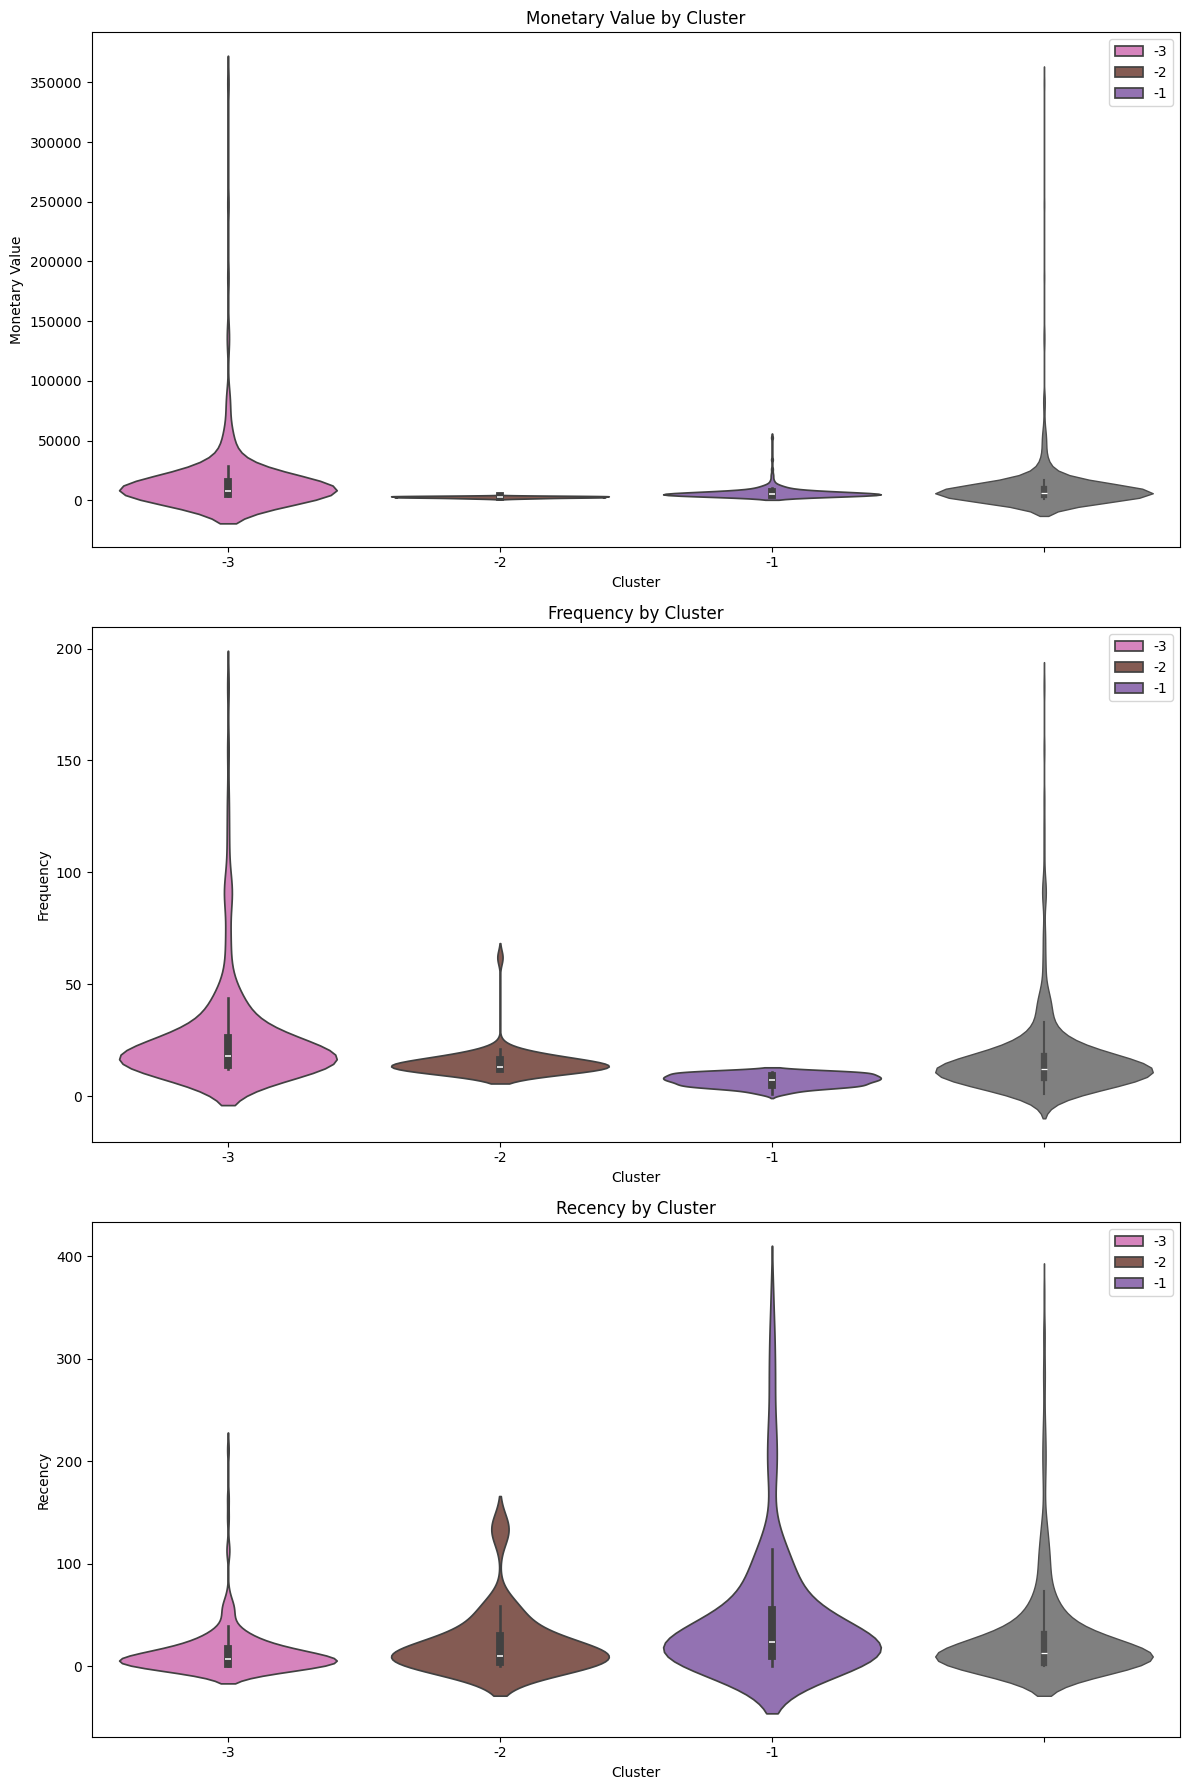

In [47]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

### Cluster -1 (Monetary Outliers) PAMPER: 
Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

### Cluster -2 (Frequency Outliers) UPSELL: 
Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

### Cluster -3 (Monetary & Frequency Outliers) DELIGHT: 
Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [48]:
# Now adding these labels to our data

cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [49]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

Customer ID        MonetaryValue  Frequency     LastInvoiceDate  \
0                12346.00               169.36          2 2010-06-28 13:53:00   
1                12347.00              1323.32          2 2010-12-07 14:57:00   
2                12348.00               221.16          1 2010-09-27 14:59:00   
3                12349.00              2221.14          2 2010-10-28 08:23:00   
4                12351.00               300.93          1 2010-11-29 15:23:00   
...                   ...                  ...        ...                 ...   
4235             18223.00              7516.31         12 2010-11-17 12:20:00   
4236             18225.00              7545.14         15 2010-12-09 15:46:00   
4237             18226.00              6650.83         15 2010-11-26 15:51:00   
4241             18231.00              4791.80         23 2010-10-29 14:17:00   
4262             18260.00              7318.91         17 2010-11-30 12:25:00   

      Recency  Cluster  
0         164        0  
1           2        3  
2          73        2  
3          42        3  
4          10        2  
...       ...      ...  
4235       22       -3  
4236        0       -3  
4237       13       -3  
4241       41       -3  
4262        9       -3  

[4285 rows x 6 columns]

In [50]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df


Customer ID        MonetaryValue  Frequency     LastInvoiceDate  \
0                12346.00               169.36          2 2010-06-28 13:53:00   
1                12347.00              1323.32          2 2010-12-07 14:57:00   
2                12348.00               221.16          1 2010-09-27 14:59:00   
3                12349.00              2221.14          2 2010-10-28 08:23:00   
4                12351.00               300.93          1 2010-11-29 15:23:00   
...                   ...                  ...        ...                 ...   
4235             18223.00              7516.31         12 2010-11-17 12:20:00   
4236             18225.00              7545.14         15 2010-12-09 15:46:00   
4237             18226.00              6650.83         15 2010-11-26 15:51:00   
4241             18231.00              4791.80         23 2010-10-29 14:17:00   
4262             18260.00              7318.91         17 2010-11-30 12:25:00   

      Recency  Cluster ClusterLabel  
0         164        0       RETAIN  
1           2        3       REWARD  
2          73        2      NURTURE  
3          42        3       REWARD  
4          10        2      NURTURE  
...       ...      ...          ...  
4235       22       -3      DELIGHT  
4236        0       -3      DELIGHT  
4237       13       -3      DELIGHT  
4241       41       -3      DELIGHT  
4262        9       -3      DELIGHT  

[4285 rows x 7 columns]

In [51]:
full_clustering_df.to_csv('full_clustering_data.csv', index=False)

# Visualisation

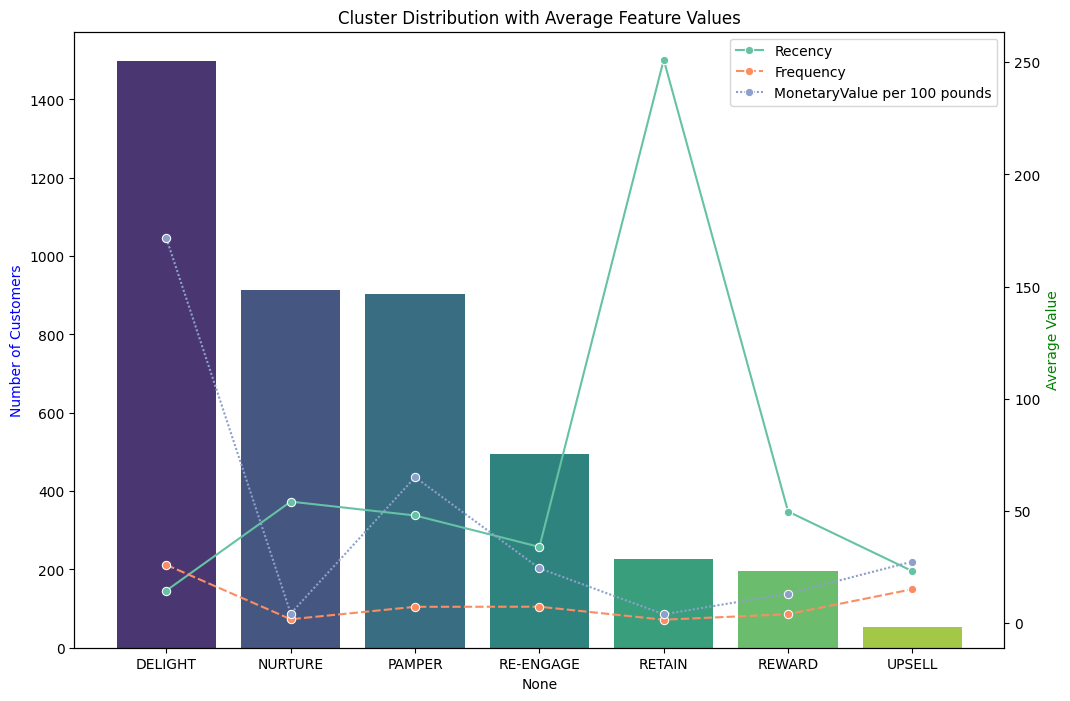

In [52]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()

# Customer Lifetime Value (CLV)

---

# Business Goals:
1. How much can we spend to acquire a customer? Lifetime value - Cost to acquire customer (LTV - CAC)
2. WHich customers are most valuable? Segmentation (Done using K-means clustering earlier)
3. How can we increase customer lifetime value? Marketing stratergy

## 3 parts 
1. Descriptive CLV models
2. Probabilistic CLV models
3. Predictive CLV models


In [7]:
import pytimetk as tk

## Part 1:Descriptive CLV Models (Beginner)

- In this section we implement descriptive CLV models using transactional data to analyze customer purchasing behavior. 
- Below is a breakdown of each part of the code, the methodology, and how it helps generate valuable business insights.

### Data Preprocessing and Exploratory Analysis

- Objective:

Load and clean the dataset for further analysis.
Convert the InvoiceDate column to a datetime format, allowing for time-based calculations and aggregations.
Calculate total revenue from all transactions (SalesLineTotal), providing an overall picture of business performance.


In [8]:
import pandas as pd

In [4]:
transactions_df = pd.read_csv('data/cleaned_df.csv')
transactions_df.head()

Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  SalesLineTotal  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom            83.4  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom            81.0  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom            81.0  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom           100.8  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom            30.0

In [10]:
transactions_df.glimpse()

<class 'pandas.core.frame.DataFrame'>: 406309 rows of 9 columns
Invoice:         int64             [489434, 489434, 489434, 489434, 4894 ...
StockCode:       object            ['85048', '79323P', '79323W', '22041' ...
Description:     object            ['15CM CHRISTMAS GLASS BALL 20 LIGHTS ...
Quantity:        int64             [12, 12, 12, 48, 24, 24, 24, 10, 12,  ...
InvoiceDate:     object            ['2009-12-01 07:45:00', '2009-12-01 0 ...
Price:           float64           [6.95, 6.75, 6.75, 2.1, 1.25, 1.65, 1 ...
Customer ID:     float64           [13085.0, 13085.0, 13085.0, 13085.0,  ...
Country:         object            ['United Kingdom', 'United Kingdom',  ...
SalesLineTotal:  float64           [83.4, 81.0, 81.0, 100.8, 30.0, 39.6, ...


In [11]:
df = transactions_df.copy()

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [13]:
df['SalesLineTotal'].sum()

8673383.344000002

- Insights:

The total sales (8673383.34) give an idea of the company's revenue over the analyzed period.

### Aggregating Sales Over Time

- Objective:

Aggregate the sales data by month to visualize sales trends over time.


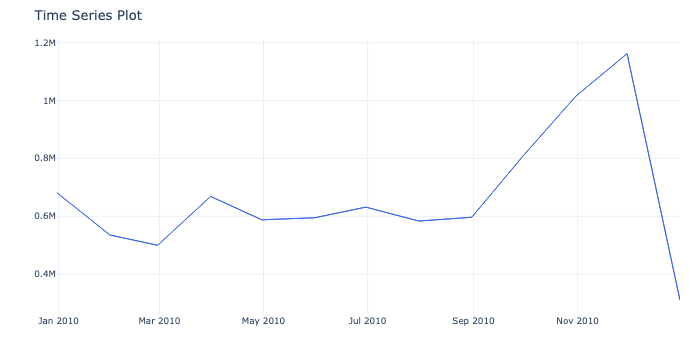

In [14]:
df[['InvoiceDate','SalesLineTotal']] \
    .summarize_by_time(
        date_column = 'InvoiceDate',
        value_column = 'SalesLineTotal',
        agg_func = 'sum',
        freq = 'M'
    ) \
    .plot_timeseries('InvoiceDate','SalesLineTotal')

- Insights:

By plotting the sales over time, businesses can detect seasonality, growth patterns, or periods of decline. This is essential for understanding customer behavior and sales cycles.

### Model 1: Aggregation models

- Objective:

    - Aggregation models are used to calculate the average customer lifetime value for a group of customers or a cohort
    -  We do that first by calculating customer-specific metrics such as the number of days between their first and last purchase, purchase frequency, and total/average sales.

In [15]:
customer_sales_1_df = df \
    .groupby(['Customer ID','Invoice']) \
    .agg(
        total_sales_invoice = ('SalesLineTotal','sum'),
        InvoiceDate = ('InvoiceDate','max')
    ) \
    .reset_index() \
    .groupby('Customer ID')\
    .agg(
        # Time difference in days
        time_days = ('InvoiceDate',lambda x: (x.max() - x.min()).
        days),
        # Count of unique 'Invoice'
        frequency = ('Invoice','nunique'),
        # Sum of 'sales_value'
        total_sales = ('total_sales_invoice','sum'),
        avg_sales=('total_sales_invoice','mean')
    ) \
    .reset_index()

customer_sales_1_df

Customer ID  time_days  frequency  total_sales    avg_sales
0         12346.0        118          2       169.36    84.680000
1         12347.0         37          2      1323.32   661.660000
2         12348.0          0          1       221.16   221.160000
3         12349.0        181          2      2221.14  1110.570000
4         12351.0          0          1       300.93   300.930000
...           ...        ...        ...          ...          ...
4280      18283.0        275          6       641.77   106.961667
4281      18284.0          0          1       411.68   411.680000
4282      18285.0          0          1       377.00   377.000000
4283      18286.0        247          2      1246.43   623.215000
4284      18287.0        188          4      2295.71   573.927500

[4285 rows x 5 columns]

- Insights:

Customer purchase frequency and average sales give a rough idea of each customer’s value. These are foundational metrics for calculating CLV and guiding customer segmentation.

#### Summary of Customer Behavior
- Objective:

Summarize key metrics across the entire customer base, including the churn rate (i.e., the percentage of customers who made a single purchase) and average sales.


In [63]:
summary_1 = {
    'average_sales': customer_sales_1_df['avg_sales'].mean(),
    'average_purchase_freq': customer_sales_1_df['frequency'].mean(),
    'churn_rate': 1 - (customer_sales_1_df['frequency']>1).sum()/ len(customer_sales_1_df['frequency']),
    #churn rate can also be if customer visited only once a month or whatever fits the business  
    'max_days': customer_sales_1_df['time_days'].max()
}

In [64]:
summary_1_df = pd.DataFrame([summary_1])

In [65]:
summary_1_df

average_sales  average_purchase_freq           churn_rate  max_days
0               375.66                   4.43                 0.33       373

- Insights:

Average churn rate helps understand customer retention issues, providing a high-level view of customer loyalty.

Average sales and frequency provide a benchmark to assess if marketing strategies are effectively increasing customer lifetime value.

#### CLV Calculation Using Descriptive Method

- Define the constants 
- Using the basic CLV equation used in Descriptive methods (Lifespan Method)
- CLV = avg purchcase value X purchase freq X customer lifespan

In [5]:
# Constants
profit_margin = 0.15 # 15% profit on products
customer_lifetime = 5 # 5 years
eps_churn_rate = 0.001 # to avoid division by zero


##### Churn CLV Calculation and Lifetime CLV Calulation

Calculate CLV using two methods:

In [68]:
# Churn CLV 
summary_1_df['clv_churn_method'] = (summary_1_df['average_sales'] * summary_1_df['average_purchase_freq'] / (summary_1_df
        ['churn_rate'] + eps_churn_rate)) * profit_margin

print(summary_1_df['clv_churn_method'])

0                 754.05
Name: clv_churn_method, dtype: float64


- This is essentially a customer lifetime value (CLV) calculation, adjusted for churn. It estimates how much profit a customer is expected to bring to the business before they churn.

In [69]:
# Lifetime CL calc
summary_1_df['clv_lifetime_method'] = (summary_1_df
    ['average_sales'] * summary_1_df['average_purchase_freq'] /
    (summary_1_df['max_days'] / 365) * customer_lifetime) * profit_margin

-  This method estimates the Customer Lifetime Value (CLV) by calculating how much a customer will spend on average during their active lifetime, based on historical data. 

In [70]:
summary_1_df

average_sales  average_purchase_freq           churn_rate  max_days  \
0               375.66                   4.43                 0.33       373   

      clv_churn_method  clv_lifetime_method  
0               754.05              1220.29

#### So if we spend 100\\$ to acquire a customer to get 1220.29\\$ , that's a good business model
#### but if we spend 1220.29\\$ or more to acquire a customer to get 1220.29\\$, then that's a bad business model

- Insights:

These metrics provide actionable insights for budget allocation in customer acquisition and retention strategies. For example, if a customer generates a CLV of $1220 but the cost of acquiring that customer is higher, then the acquisition model needs adjustment.

#### The Issue

- The issue is the accuracy, do you believe that? 
- One way we can enhance this is by using cohort models
- Adds more granularity, still not going to be perfect but it's still relatively easy to do

### Model 2: Cohort models
- Cohort models are used to calculate the average customer lifetime value for a group of customers or a cohort. 
- Often times, the cohort is defined by the customer's first purchase date

- Objective:

    - Analyze customer behavior based on the month of their first purchase. This allows for the identification of trends within specific customer cohorts.

- Insights:

    - Cohort analysis reveals how the behavior of customers changes over time, which can be used to develop targeted marketing and retention strategies for specific groups of customers.

In [74]:
# Constants 
profit_margin = 0.15 # 15% profit on products
customer_lifetime = 5 # 5 years
eps_churn_rate = 0.001 


In [75]:
# Caculate start month for each Customer 
df['start_month'] = df.groupby('Customer ID')['InvoiceDate'].transform(lambda x: x.min().strftime('%Y-%m'))


In [76]:
df.glimpse()

<class 'pandas.core.frame.DataFrame'>: 406309 rows of 10 columns
Invoice:         int64             [489434, 489434, 489434, 489434, 4894 ...
StockCode:       object            ['85048', '79323P', '79323W', '22041' ...
Description:     object            ['15CM CHRISTMAS GLASS BALL 20 LIGHTS ...
Quantity:        int64             [12, 12, 12, 48, 24, 24, 24, 10, 12,  ...
InvoiceDate:     datetime64[ns]    [Timestamp('2009-12-01 07:45:00'), Ti ...
Price:           float64           [6.95, 6.75, 6.75, 2.1, 1.25, 1.65, 1 ...
Customer ID:     float64           [13085.0, 13085.0, 13085.0, 13085.0,  ...
Country:         object            ['United Kingdom', 'United Kingdom',  ...
SalesLineTotal:  float64           [83.4, 81.0, 81.0, 100.8, 30.0, 39.6, ...
start_month:     object            ['2009-12', '2009-12', '2009-12', '20 ...


In [77]:
# Aggregate data by start month and customer ID
cohort_data = df \
    .groupby(['start_month','Customer ID','Invoice'])\
    .agg(
        total_sales_invoice=('SalesLineTotal','sum'),
        InvoiceDate = ('InvoiceDate','max')
    )\
    .reset_index()\
    .groupby(['start_month','Customer ID'])\
    .agg(
        time_days=('InvoiceDate', lambda x: (x.max()-x.min()).
        days),
        frequency = ('Invoice','nunique'),
        total_sales = ('total_sales_invoice','sum'),
        avg_sales=('total_sales_invoice','mean')
    ) \
    .reset_index()

In [78]:
# Calculate CLV metrics by start_month 
summary_2_df = cohort_data \
    .groupby('start_month') \
    .agg(
        cohort_size = ('Customer ID','nunique'),
        average_sales = ('avg_sales','mean'),
        average_purchase_freq = ('frequency','mean'),
        churn_rate = ('frequency', lambda x: 1 - (x > 1).sum() / len(x)),
        max_days=('time_days','max')
    ) \
    .reset_index()


In [79]:
# Add Churn CLV calc
summary_2_df['clv_churn_method'] = (summary_2_df
['average_sales']*summary_2_df['average_purchase_freq'] /
(summary_2_df['churn_rate'] + eps_churn_rate)) * profit_margin

In [80]:
# Add Lifetime CLV calc
summary_2_df['clv_lifetime_method'] = (summary_2_df
['average_sales']*summary_2_df['average_purchase_freq'] * customer_lifetime /
(summary_2_df['max_days']/365)) * profit_margin

In [81]:
summary_2_df

start_month  cohort_size        average_sales  average_purchase_freq  \
0      2009-12          951               400.12                   9.54   
1      2010-01          368               376.85                   5.13   
2      2010-02          375               367.06                   4.12   
3      2010-03          441               368.34                   3.97   
4      2010-04          294               359.73                   3.02   
5      2010-05          255               365.86                   2.61   
6      2010-06          267               370.21                   2.58   
7      2010-07          185               288.49                   2.68   
8      2010-08          163               318.55                   2.45   
9      2010-09          239               460.99                   1.96   
10     2010-10          375               366.85                   1.63   
11     2010-11          326               389.60                   1.35   
12     2010-12           46               270.94                   1.02   

             churn_rate  max_days     clv_churn_method  clv_lifetime_method  
0                  0.11       373              5343.61              2802.85  
1                  0.13       338              2162.95              1566.72  
2                  0.21       309              1099.39              1339.76  
3                  0.26       283               838.52              1415.50  
4                  0.30       244               543.30              1220.39  
5                  0.35       217               404.35              1203.61  
6                  0.38       186               377.28              1404.00  
7                  0.35       160               328.61              1320.67  
8                  0.43       128               271.73              1667.66  
9                  0.55        97               244.72              2547.53  
10                 0.63        67               142.71              2450.21  
11                 0.75        35               105.00              4103.51  
12                 0.98         5                42.40             15156.33

### Conclusions from the Aggregation models and Cohort models
1. I don't trust these Customer Lifetime Value (CLV) calculations. They are super optimistic for the churn calculation. Lifetime is a bit more realistic, but still has not earned my trust.
2. The bottom line is that as we get more granular, we can gain higher accuracy in our CLV calculations.
3. The next step is to build predictive models to forecast future customer lifetime values

- CLV estimates that are overly optimistic (especially churn-based models) highlight the need for predictive modeling. Cohort-based lifetime estimates are more realistic, but businesses should refine their CLV calculation using more sophisticated models.

## Part 2: Probabilistic CLV models (Intermediate)

In [82]:
import lifetimes as lf
from lifetimes.plotting import plot_probability_alive_matrix

In [83]:
# Consants
profit_margin = 0.15 # 15% profit on products

In [84]:
# Data
transactions_df = pd.read_csv('cleaned_df.csv')

In [85]:
df = transactions_df.copy()

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.glimpse()

<class 'pandas.core.frame.DataFrame'>: 406309 rows of 9 columns
Invoice:         int64             [489434, 489434, 489434, 489434, 4894 ...
StockCode:       object            ['85048', '79323P', '79323W', '22041' ...
Description:     object            ['15CM CHRISTMAS GLASS BALL 20 LIGHTS ...
Quantity:        int64             [12, 12, 12, 48, 24, 24, 24, 10, 12,  ...
InvoiceDate:     datetime64[ns]    [Timestamp('2009-12-01 07:45:00'), Ti ...
Price:           float64           [6.95, 6.75, 6.75, 2.1, 1.25, 1.65, 1 ...
Customer ID:     float64           [13085.0, 13085.0, 13085.0, 13085.0,  ...
Country:         object            ['United Kingdom', 'United Kingdom',  ...
SalesLineTotal:  float64           [83.4, 81.0, 81.0, 100.8, 30.0, 39.6, ...


### Probabilistic models
#### Probabilistic models are used to predict the future transactions and churn rate of a customer

#### Summary Data for probabilistic models 
It's generated using lifetimes library and it's summary_data_from_transaction_data() function, which calculates:

frequency: How many repeat purchases a customer has made.

recency: The time between a customer's first and last transaction.

T: The time since the customer's first transaction.

monetary_value: The average value of transactions per customer.


In [87]:
# Data preparation

summary_3_df = lf.utils.summary_data_from_transaction_data(
    df,
    customer_id_col = 'Customer ID',
    datetime_col = 'InvoiceDate',
    monetary_value_col = 'SalesLineTotal',
)

In [88]:
summary_3_df

frequency              recency                    T  \
Customer ID                                                                  
12346.00                    1.00               118.00               282.00   
12347.00                    1.00                37.00                39.00   
12348.00                    0.00                 0.00                73.00   
12349.00                    1.00               182.00               224.00   
12351.00                    0.00                 0.00                10.00   
...                          ...                  ...                  ...   
18283.00                    4.00               276.00               293.00   
18284.00                    0.00                 0.00                66.00   
18285.00                    0.00                 0.00               295.00   
18286.00                    1.00               247.00               358.00   
18287.00                    2.00               189.00               206.00   

                  monetary_value  
Customer ID                       
12346.00                  142.31  
12347.00                  711.79  
12348.00                    0.00  
12349.00                 1152.62  
12351.00                    0.00  
...                          ...  
18283.00                  135.10  
18284.00                    0.00  
18285.00                    0.00  
18286.00                  833.48  
18287.00                  612.05  

[4285 rows x 4 columns]

#### Handling Non-Positive Values 
- Negative or Zero Transaction Values: These are removed since they would cause errors in the Gamma-Gamma model, which predicts the average transaction value.

In [90]:
# if null values , we remove it 
summary_3_df[summary_3_df['monetary_value'] <= 0]
summary_3_df = summary_3_df[summary_3_df['monetary_value'] > 0] 

In [91]:
summary_3_df[summary_3_df['monetary_value'] <= 0]


Empty DataFrame
Columns: [frequency, recency, T, monetary_value]
Index: []

### BG/NBD model 
- The BG/NBD model is a probabilistic model that predicts the number of repeat purchases a customer will make
- BG/NBD model can only predict the future transactions and churn rate of a customer
- The model is fitted on frequency, recency, and T values. 

In [93]:
bgf = lf.BetaGeoFitter(penalizer_coef=0.15)

In [94]:
bgf.fit(summary_3_df['frequency'], summary_3_df['recency'], summary_3_df['T'])


<lifetimes.BetaGeoFitter: fitted with 2808 subjects, a: 0.00, alpha: 49.32, b: 0.06, r: 0.87>

In [95]:
bgf.summary

coef             se(coef)      lower 95% bound  \
r                     0.87                 0.02                 0.83   
alpha                49.32                 1.59                46.22   
a                     0.00                 0.00                -0.00   
b                     0.06                 0.03                 0.00   

           upper 95% bound  
r                     0.91  
alpha                52.43  
a                     0.00  
b                     0.12

#### Conditional probability alive
The Conditional Probability Alive for each customer is calculated, showing the likelihood a customer is still "alive" (i.e., will make future purchases).

In [96]:
summary_3_df['probability_alive'] = bgf.conditional_probability_alive(summary_3_df['frequency'],
                                                                      summary_3_df['recency'],
                                                                      summary_3_df['T'])

In [97]:
summary_3_df

frequency              recency                    T  \
Customer ID                                                                  
12346.00                    1.00               118.00               282.00   
12347.00                    1.00                37.00                39.00   
12349.00                    1.00               182.00               224.00   
12352.00                    1.00                17.00                27.00   
12356.00                    2.00                44.00                59.00   
...                          ...                  ...                  ...   
18276.00                    4.00               337.00               364.00   
18277.00                    2.00                97.00               129.00   
18283.00                    4.00               276.00               293.00   
18286.00                    1.00               247.00               358.00   
18287.00                    2.00               189.00               206.00   

                  monetary_value    probability_alive  
Customer ID                                            
12346.00                  142.31                 0.92  
12347.00                  711.79                 0.98  
12349.00                 1152.62                 0.97  
12352.00                  200.05                 0.97  
12356.00                 1163.90                 1.00  
...                          ...                  ...  
18276.00                  275.65                 1.00  
18277.00                  366.26                 1.00  
18283.00                  135.10                 1.00  
18286.00                  833.48                 0.96  
18287.00                  612.05                 1.00  

[2808 rows x 5 columns]

#### Visualizing the probability alive matrix
- The probability alive matrix is visualized using the plot_probability_alive_matrix() function.

<AxesSubplot: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

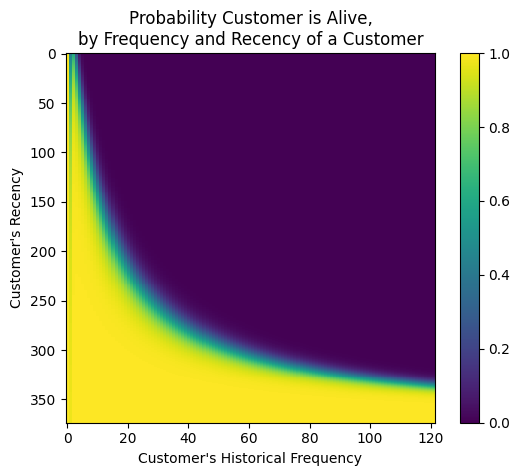

In [98]:
plot_probability_alive_matrix(bgf, cmap = 'viridis')

#### If a customer has bought multiple times (frequency) and the time between the first & last transaction is high (receny), then his/her probability of being alive is high 

### GAMMA-GAMMA Model
- The Gamma-Gamma model is used to predict the average transaction value for each customer based on their frequency and monetary_value.

In [100]:
ggf = lf.GammaGammaFitter(penalizer_coef=0.1)

In [101]:
ggf.fit(summary_3_df['frequency'], summary_3_df['monetary_value'])


<lifetimes.GammaGammaFitter: fitted with 2808 subjects, p: 1.03, q: 0.18, v: 0.93>

#### This generates a predicted_avg_sales column, showing the predicted average sales for each customer.

In [102]:
summary_3_df['predicted_avg_sales'] = ggf.conditional_expected_average_profit(summary_3_df['frequency'],summary_3_df['monetary_value'])

In [103]:
summary_3_df

frequency              recency                    T  \
Customer ID                                                                  
12346.00                    1.00               118.00               282.00   
12347.00                    1.00                37.00                39.00   
12349.00                    1.00               182.00               224.00   
12352.00                    1.00                17.00                27.00   
12356.00                    2.00                44.00                59.00   
...                          ...                  ...                  ...   
18276.00                    4.00               337.00               364.00   
18277.00                    2.00                97.00               129.00   
18283.00                    4.00               276.00               293.00   
18286.00                    1.00               247.00               358.00   
18287.00                    2.00               189.00               206.00   

                  monetary_value    probability_alive  predicted_avg_sales  
Customer ID                                                                 
12346.00                  142.31                 0.92               717.33  
12347.00                  711.79                 0.98              3569.25  
12349.00                 1152.62                 0.97              5776.91  
12352.00                  200.05                 0.97              1006.49  
12356.00                 1163.90                 1.00              1941.13  
...                          ...                  ...                  ...  
18276.00                  275.65                 1.00               344.89  
18277.00                  366.26                 1.00               611.38  
18283.00                  135.10                 1.00               169.19  
18286.00                  833.48                 0.96              4178.67  
18287.00                  612.05                 1.00              1021.13  

[2808 rows x 6 columns]

#### Predict the Customer Lifetime Value for next 90 days

 - The CLV for the next 90 days is predicted using the Gamma-Gamma model. This is stored in the predicted_clv_3mo column.
 - The customer_lifetime_value() method integrates the predicted future transactions from the BG/NBD model and the average transaction value from the Gamma-Gamma model.

In [104]:
summary_3_df['predicted_clv_3mo'] = ggf.customer_lifetime_value(
    bgf,
    summary_3_df['frequency'],
    summary_3_df['recency'],
    summary_3_df['T'],
    summary_3_df['monetary_value'],
    time = 3, # Time in Months
    freq = 'D', # Daily
    discount_rate = 0.01 # 1% discount rate
)

In [105]:
summary_3_df

frequency              recency                    T  \
Customer ID                                                                  
12346.00                    1.00               118.00               282.00   
12347.00                    1.00                37.00                39.00   
12349.00                    1.00               182.00               224.00   
12352.00                    1.00                17.00                27.00   
12356.00                    2.00                44.00                59.00   
...                          ...                  ...                  ...   
18276.00                    4.00               337.00               364.00   
18277.00                    2.00                97.00               129.00   
18283.00                    4.00               276.00               293.00   
18286.00                    1.00               247.00               358.00   
18287.00                    2.00               189.00               206.00   

                  monetary_value    probability_alive  predicted_avg_sales  \
Customer ID                                                                  
12346.00                  142.31                 0.92               717.33   
12347.00                  711.79                 0.98              3569.25   
12349.00                 1152.62                 0.97              5776.91   
12352.00                  200.05                 0.97              1006.49   
12356.00                 1163.90                 1.00              1941.13   
...                          ...                  ...                  ...   
18276.00                  275.65                 1.00               344.89   
18277.00                  366.26                 1.00               611.38   
18283.00                  135.10                 1.00               169.19   
18286.00                  833.48                 0.96              4178.67   
18287.00                  612.05                 1.00              1021.13   

               predicted_clv_3mo  
Customer ID                       
12346.00                  328.00  
12347.00                 6487.50  
12349.00                 3369.76  
12352.00                 2103.89  
12356.00                 4521.68  
...                          ...  
18276.00                  358.10  
18277.00                  865.06  
18283.00                  212.11  
18286.00                 1618.78  
18287.00                 1010.01  

[2808 rows x 7 columns]

#### Profit Calculation

In [106]:
# Don't forget to add in profit margin
summary_3_df['predicted_profit_3mo'] = summary_3_df['predicted_clv_3mo']*profit_margin

In [107]:
summary_3_df

frequency              recency                    T  \
Customer ID                                                                  
12346.00                    1.00               118.00               282.00   
12347.00                    1.00                37.00                39.00   
12349.00                    1.00               182.00               224.00   
12352.00                    1.00                17.00                27.00   
12356.00                    2.00                44.00                59.00   
...                          ...                  ...                  ...   
18276.00                    4.00               337.00               364.00   
18277.00                    2.00                97.00               129.00   
18283.00                    4.00               276.00               293.00   
18286.00                    1.00               247.00               358.00   
18287.00                    2.00               189.00               206.00   

                  monetary_value    probability_alive  predicted_avg_sales  \
Customer ID                                                                  
12346.00                  142.31                 0.92               717.33   
12347.00                  711.79                 0.98              3569.25   
12349.00                 1152.62                 0.97              5776.91   
12352.00                  200.05                 0.97              1006.49   
12356.00                 1163.90                 1.00              1941.13   
...                          ...                  ...                  ...   
18276.00                  275.65                 1.00               344.89   
18277.00                  366.26                 1.00               611.38   
18283.00                  135.10                 1.00               169.19   
18286.00                  833.48                 0.96              4178.67   
18287.00                  612.05                 1.00              1021.13   

               predicted_clv_3mo  predicted_profit_3mo  
Customer ID                                             
12346.00                  328.00                 49.20  
12347.00                 6487.50                973.12  
12349.00                 3369.76                505.46  
12352.00                 2103.89                315.58  
12356.00                 4521.68                678.25  
...                          ...                   ...  
18276.00                  358.10                 53.72  
18277.00                  865.06                129.76  
18283.00                  212.11                 31.82  
18286.00                 1618.78                242.82  
18287.00                 1010.01                151.50  

[2808 rows x 8 columns]

### Conclusions from the BG/NBD and Gamma-Gamma models
1. Now we know how much we can spend to target these customers in the next 3 months
2. Much better than the historical / descriptive models as it predicts the future transactions and churn rate of a customer
3. However, we don't know what relationships exist between the features and the lifetime value of a customer, and therefore, we can't confidently improve the business
4. The next step is to build predictive models to forecast future customer lifetime value and to understand the relationships between the features and the lifetime value of a customer

# Part 3: Predictive CLV models (Advanced)

- We do this part to build predictive models to forecast future customer lifetime value and to understand the relationships between the features and the lifetime value of a customer

In [19]:
import pycaret.classification as clf
import pycaret.regression as reg

In [20]:
import pycaret
import sklearn

print(f"PyCaret version: {pycaret.__version__}") #pycaret==3.2.0
print(f"Scikit-learn version: {sklearn.__version__}") #scikit-learn==1.2.0

PyCaret version: 3.2.0
Scikit-learn version: 1.2.0


In [21]:
#Constants
profit_margin = 0.15 # 15% Profits on products

In [23]:
#Data 
transactions_df = pd.read_csv('data/cleaned_df.csv')

In [24]:
df = transactions_df.copy()

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.glimpse()

<class 'pandas.core.frame.DataFrame'>: 406309 rows of 9 columns
Invoice:         int64             [489434, 489434, 489434, 489434, 4894 ...
StockCode:       object            ['85048', '79323P', '79323W', '22041' ...
Description:     object            ['15CM CHRISTMAS GLASS BALL 20 LIGHTS ...
Quantity:        int64             [12, 12, 12, 48, 24, 24, 24, 10, 12,  ...
InvoiceDate:     datetime64[ns]    [Timestamp('2009-12-01 07:45:00'), Ti ...
Price:           float64           [6.95, 6.75, 6.75, 2.1, 1.25, 1.65, 1 ...
Customer ID:     float64           [13085.0, 13085.0, 13085.0, 13085.0,  ...
Country:         object            ['United Kingdom', 'United Kingdom',  ...
SalesLineTotal:  float64           [83.4, 81.0, 81.0, 100.8, 30.0, 39.6, ...


In [25]:
df = df.rename(columns={'Customer ID': 'Customer_ID'})

#### Machine Learning
Frame the problem:
- What will the customers spend in the next 90-days? (Regression)
- What is the probability of a customer to make a purcahse in next 90-days? (Classification)

#### Setting the time frame:

- n_days = 90: This specifies that you want to consider the last 90 days for testing.
- max_date = df['InvoiceDate'].max(): This gets the most recent date in the InvoiceDate column.
- cutoff = max_date - pd.to_timedelta(n_days, unit="d"): This calculates the cutoff date by subtracting 90 days from the most recent date. Any data before this date will be used for training, and data on or after this date will be for testing.

In [26]:
n_days = 90
max_date = df['InvoiceDate'].max()
cutoff = max_date - pd.to_timedelta(n_days, unit = "d")

In [27]:
#Train-Test split
temporal_in_df = df[df['InvoiceDate']<cutoff]

In [28]:
temporal_out_df = df[df['InvoiceDate'] >= cutoff] \
    .query('Customer_ID in @temporal_in_df.Customer_ID')

In [29]:
temporal_out_df.glimpse()

<class 'pandas.core.frame.DataFrame'>: 112835 rows of 9 columns
Invoice:         int64             [522069, 522070, 522070, 522070, 5220 ...
StockCode:       object            ['22087', '46000M', '21559', '21485', ...
Description:     object            ['PAPER BUNTING WHITE LACE', 'POLYEST ...
Quantity:        int64             [4, 5, 5, 5, 3, 12, 12, 2, 2, 2, 8, 6 ...
InvoiceDate:     datetime64[ns]    [Timestamp('2010-09-12 10:18:00'), Ti ...
Price:           float64           [2.95, 1.55, 2.55, 4.95, 1.95, 0.42,  ...
Customer_ID:     float64           [18260.0, 17377.0, 17377.0, 17377.0,  ...
Country:         object            ['United Kingdom', 'United Kingdom',  ...
SalesLineTotal:  float64           [11.8, 7.75, 12.75, 24.75, 5.85, 5.04 ...


##### Feature Engineering
- Most challenging part
- 2-stage process
- Need to frame the problem
- Need to think about what features to include

##### Make Targets from out data

In [30]:
targets_df = temporal_out_df[['Customer_ID','InvoiceDate','SalesLineTotal']]\
    .groupby('Customer_ID')\
    .sum()\
    .rename({'SalesLineTotal':'sales_90_value'}, axis=1) \
    .assign(sales_90_flag = 1)

In [31]:
targets_df

sales_90_value  sales_90_flag
Customer_ID                               
12349.0             1152.62              1
12358.0              821.08              1
12359.0              551.33              1
12360.0              690.79              1
12369.0             1202.83              1
...                     ...            ...
18262.0              226.00              1
18276.0              636.99              1
18277.0              732.53              1
18283.0              195.35              1
18287.0             1224.10              1

[1937 rows x 2 columns]

##### We created our targets which comes from our out, now we gonna create our features from our in dataset
##### Make Recency (Date) features from in data 

In [32]:
max_date = temporal_in_df['InvoiceDate'].max()

In [33]:
recency_features_df = temporal_in_df \
    [['Customer_ID','InvoiceDate']] \
    .groupby('Customer_ID') \
    .apply(
        lambda x: int((x['InvoiceDate'].max() - max_date) / pd.to_timedelta(1,"day"))
    ) \
    .to_frame() \
    .set_axis(["recency"],axis=1)
      

In [34]:
recency_features_df

recency
Customer_ID         
12346.0          -74
12349.0         -134
12355.0         -112
12358.0          -95
12359.0          -80
...              ...
18281.0         -122
18283.0          -22
18285.0         -205
18286.0          -21
18287.0         -116

[3355 rows x 1 columns]

##### Make Frequency (count) features

In [35]:
frequency_features_df = temporal_in_df \
    [['Customer_ID','InvoiceDate']]\
    .groupby('Customer_ID')\
    .count()\
    .set_axis(['frequency'],axis=1)

In [36]:
frequency_features_df

frequency
Customer_ID           
12346.0             24
12349.0             46
12355.0             22
12358.0             35
12359.0             86
...                ...
18281.0             10
18283.0            171
18285.0             11
18286.0             66
18287.0             54

[3355 rows x 1 columns]

##### Make monetary features from in data

In [37]:
monetary_features_df = temporal_in_df \
    .groupby('Customer_ID')\
    .aggregate(
        {
            'SalesLineTotal':['sum','mean']
        }
    )\
    .set_axis(['SalesLineTotal_sum','SalesLineTotal_mean'],axis = 1)

In [38]:
monetary_features_df

SalesLineTotal_sum  SalesLineTotal_mean
Customer_ID                                         
12346.0                  169.36             7.056667
12349.0                 1068.52            23.228696
12355.0                  488.21            22.191364
12358.0                 1697.93            48.512286
12359.0                 2012.03            23.395698
...                         ...                  ...
18281.0                  120.32            12.032000
18283.0                  446.42             2.610643
18285.0                  377.00            34.272727
18286.0                 1246.43            18.885303
18287.0                 1071.61            19.844630

[3355 rows x 2 columns]

##### Other features

In [39]:
temporal_in_df.glimpse()

<class 'pandas.core.frame.DataFrame'>: 256470 rows of 9 columns
Invoice:         int64             [489434, 489434, 489434, 489434, 4894 ...
StockCode:       object            ['85048', '79323P', '79323W', '22041' ...
Description:     object            ['15CM CHRISTMAS GLASS BALL 20 LIGHTS ...
Quantity:        int64             [12, 12, 12, 48, 24, 24, 24, 10, 12,  ...
InvoiceDate:     datetime64[ns]    [Timestamp('2009-12-01 07:45:00'), Ti ...
Price:           float64           [6.95, 6.75, 6.75, 2.1, 1.25, 1.65, 1 ...
Customer_ID:     float64           [13085.0, 13085.0, 13085.0, 13085.0,  ...
Country:         object            ['United Kingdom', 'United Kingdom',  ...
SalesLineTotal:  float64           [83.4, 81.0, 81.0, 100.8, 30.0, 39.6, ...


In [40]:
# Transactions last month
cutoff_28d = cutoff - pd.to_timedelta(28, unit ="d")

In [41]:
transactions_last_month_df = temporal_in_df[['Customer_ID','InvoiceDate']]\
    .drop_duplicates()\
    .query('InvoiceDate >= @cutoff_28d')\
    .groupby('Customer_ID')\
    .size()\
    .to_frame()\
    .set_axis(['transactions_last_month'], axis = 1)


In [42]:
transactions_last_month_df

transactions_last_month
Customer_ID                         
12361.0                            1
12380.0                            1
12391.0                            1
12414.0                            1
12423.0                            1
...                              ...
18255.0                            1
18258.0                            1
18260.0                            2
18283.0                            1
18286.0                            1

[855 rows x 1 columns]

In [43]:
# Transactions last 2 weeks 
cutoff_14d = cutoff - pd.to_timedelta(14, unit ="d")

transactions_last_2weeks_df = temporal_in_df[['Customer_ID','InvoiceDate']]\
    .drop_duplicates()\
    .query('InvoiceDate >= @cutoff_14d')\
    .groupby('Customer_ID')\
    .size()\
    .to_frame()\
    .set_axis(['transactions_last_2weeks'], axis = 1)


In [44]:
transactions_last_2weeks_df

transactions_last_2weeks
Customer_ID                          
12361.0                             1
12380.0                             1
12391.0                             1
12414.0                             1
12423.0                             1
...                               ...
18182.0                             1
18226.0                             2
18255.0                             1
18258.0                             1
18260.0                             1

[452 rows x 1 columns]

In [45]:
#Spend Last 2 weeks

cutoff_14d = cutoff - pd.to_timedelta(14, unit ="d")

sales_last_2weeks_df = temporal_in_df[['Customer_ID','InvoiceDate','SalesLineTotal']]\
    .drop_duplicates()\
    .query('InvoiceDate >= @cutoff_14d')\
    .groupby('Customer_ID')\
    .size()\
    .to_frame()\
    .set_axis(['sales_value_last_2weeks'], axis = 1)


In [46]:
sales_last_2weeks_df

sales_value_last_2weeks
Customer_ID                         
12361.0                            2
12380.0                           23
12391.0                           31
12414.0                            5
12423.0                            7
...                              ...
18182.0                            9
18226.0                           18
18255.0                            7
18258.0                            7
18260.0                           13

[452 rows x 1 columns]

##### Combine features

In [47]:
features_df = pd.concat(
    [recency_features_df, frequency_features_df,
     monetary_features_df, transactions_last_month_df,
     transactions_last_2weeks_df, sales_last_2weeks_df], axis=1
)\
    .merge(
        targets_df,
        left_index=True,
        right_index=True,
        how='left'
    )\
    .fillna(0)


In [48]:
features_df

recency  frequency  SalesLineTotal_sum  SalesLineTotal_mean  \
Customer_ID                                                                
12346.0          -74         24              169.36             7.056667   
12349.0         -134         46             1068.52            23.228696   
12355.0         -112         22              488.21            22.191364   
12358.0          -95         35             1697.93            48.512286   
12359.0          -80         86             2012.03            23.395698   
...              ...        ...                 ...                  ...   
18281.0         -122         10              120.32            12.032000   
18283.0          -22        171              446.42             2.610643   
18285.0         -205         11              377.00            34.272727   
18286.0          -21         66             1246.43            18.885303   
18287.0         -116         54             1071.61            19.844630   

             transactions_last_month  transactions_last_2weeks  \
Customer_ID                                                      
12346.0                          0.0                       0.0   
12349.0                          0.0                       0.0   
12355.0                          0.0                       0.0   
12358.0                          0.0                       0.0   
12359.0                          0.0                       0.0   
...                              ...                       ...   
18281.0                          0.0                       0.0   
18283.0                          1.0                       0.0   
18285.0                          0.0                       0.0   
18286.0                          1.0                       0.0   
18287.0                          0.0                       0.0   

             sales_value_last_2weeks  sales_90_value  sales_90_flag  
Customer_ID                                                          
12346.0                          0.0            0.00            0.0  
12349.0                          0.0         1152.62            1.0  
12355.0                          0.0            0.00            0.0  
12358.0                          0.0          821.08            1.0  
12359.0                          0.0          551.33            1.0  
...                              ...             ...            ...  
18281.0                          0.0            0.00            0.0  
18283.0                          0.0          195.35            1.0  
18285.0                          0.0            0.00            0.0  
18286.0                          0.0            0.00            0.0  
18287.0                          0.0         1224.10            1.0  

[3355 rows x 9 columns]

#### Machine learning 
##### We will use pycaret to quickly build a predictive model

#### Regression

In [49]:
reg_setup = reg.setup(
    data = features_df.drop('sales_90_flag', axis = 1),
    target = 'sales_90_value',
    train_size = 0.8,
    normalize = True,
    session_id = 123,
    verbose = True,
    log_experiment = False
)

In [50]:
xgb_reg_model = reg.create_model('xgboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [139]:
reg_predictions_df = reg.predict_model(xgb_reg_model, data = features_df)\
                        .sort_values('prediction_label', ascending=False)

In [140]:
reg_predictions_df

recency  frequency   SalesLineTotal_sum  SalesLineTotal_mean  \
Customer_ID                                                                 
18102.00         -10        567            269041.66               474.50   
14646.00          -3       1130            168420.66               149.04   
14911.00          -2       3296             77993.53                23.66   
16684.00         -22        162             38634.92               238.49   
14156.00          -4       1783            151897.02                85.19   
...              ...        ...                  ...                  ...   
15627.00          -2         24               566.90                23.62   
17369.00           0          1               979.20               979.20   
13734.00         -53         28              6701.64               239.34   
15094.00          -8          5                83.00                16.60   
12980.00          -1         22              5922.48               269.20   

             transactions_last_month  transactions_last_2weeks  \
Customer_ID                                                      
18102.00                        4.00                      1.00   
14646.00                        5.00                      3.00   
14911.00                       15.00                      6.00   
16684.00                        3.00                      0.00   
14156.00                        7.00                      1.00   
...                              ...                       ...   
15627.00                        1.00                      1.00   
17369.00                        1.00                      1.00   
13734.00                        0.00                      0.00   
15094.00                        1.00                      1.00   
12980.00                        1.00                      1.00   

             sales_value_last_2weeks        sales_90_flag  \
Customer_ID                                                 
18102.00                        2.00                 1.00   
14646.00                       40.00                 1.00   
14911.00                      137.00                 1.00   
16684.00                        0.00                 1.00   
14156.00                       12.00                 1.00   
...                              ...                  ...   
15627.00                        9.00                 0.00   
17369.00                        1.00                 0.00   
13734.00                        0.00                 0.00   
15094.00                        2.00                 0.00   
12980.00                        2.00                 1.00   

                  sales_90_value     prediction_label  
Customer_ID                                            
18102.00                80122.68             80116.29  
14646.00                79192.85             78978.28  
14911.00                62385.36             62327.92  
16684.00                41854.29             41884.74  
14156.00                34951.98             34958.10  
...                          ...                  ...  
15627.00                    0.00               -90.56  
17369.00                    0.00               -95.09  
13734.00                    0.00              -105.19  
15094.00                    0.00              -108.89  
12980.00                 2948.40              -188.85  

[3355 rows x 10 columns]

Regression tells us how much they are going to spend, it doesn't tell me whether or not they are falling off or churning over the next 90 days, that's why we use classification model

#### Classification (Spend Probability)

In [141]:
clf_setup = clf.setup(
    data = features_df.drop('sales_90_value', axis = 1),
    target = 'sales_90_flag',
    train_size = 0.8,
    normalize = True,
    session_id = 123,
    verbose = True,
    log_experiment = False
)

In [142]:
xgb_clf_model = clf.create_model('xgboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [143]:
clf_predictions_df = clf.predict_model(xgb_clf_model, data = features_df, raw_score = True)\
                        .sort_values('prediction_score_1', ascending=False)

In [144]:
clf_predictions_df

recency  frequency   SalesLineTotal_sum  SalesLineTotal_mean  \
Customer_ID                                                                 
13408.00          -1        287             18028.52                62.82   
15260.00          -7        274              5317.05                19.41   
15498.00          -9        279              8113.94                29.08   
13798.00           0        269             27622.46               102.69   
14156.00          -4       1783            151897.02                85.19   
...              ...        ...                  ...                  ...   
13217.00        -200          1               132.50               132.50   
13498.00        -275         17               327.38                19.26   
17715.00        -137          1               163.20               163.20   
16443.00         -65          1               162.24               162.24   
18273.00        -135          1               153.00               153.00   

             transactions_last_month  transactions_last_2weeks  \
Customer_ID                                                      
13408.00                        3.00                      2.00   
15260.00                        2.00                      1.00   
15498.00                        2.00                      1.00   
13798.00                        4.00                      2.00   
14156.00                        7.00                      1.00   
...                              ...                       ...   
13217.00                        0.00                      0.00   
13498.00                        0.00                      0.00   
17715.00                        0.00                      0.00   
16443.00                        0.00                      0.00   
18273.00                        0.00                      0.00   

             sales_value_last_2weeks       sales_90_value  \
Customer_ID                                                 
13408.00                       10.00              5587.90   
15260.00                       15.00              2060.41   
15498.00                        5.00              4609.24   
13798.00                       10.00             11060.56   
14156.00                       12.00             34951.98   
...                              ...                  ...   
13217.00                        0.00                 0.00   
13498.00                        0.00                 0.00   
17715.00                        0.00                 0.00   
16443.00                        0.00                 0.00   
18273.00                        0.00                 0.00   

                   sales_90_flag  prediction_label   prediction_score_0  \
Customer_ID                                                               
13408.00                    1.00                 1                 0.00   
15260.00                    1.00                 1                 0.00   
15498.00                    1.00                 1                 0.00   
13798.00                    1.00                 1                 0.00   
14156.00                    1.00                 1                 0.00   
...                          ...               ...                  ...   
13217.00                    0.00                 0                 0.99   
13498.00                    0.00                 0                 0.99   
17715.00                    0.00                 0                 0.99   
16443.00                    0.00                 0                 0.99   
18273.00                    0.00                 0                 0.99   

              prediction_score_1  
Customer_ID                       
13408.00                    1.00  
15260.00                    1.00  
15498.00                    1.00  
13798.00                    1.00  
14156.00                    1.00  
...                          ...  
13217.00                    0.01  
13498.00                    0.01  
17715.00                    0.01

## Extracting Insights
### Explainable AI (XAI) can be used to understand the model 

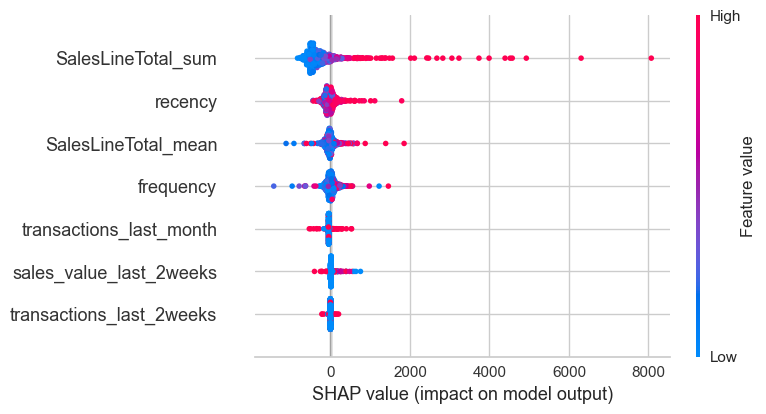

In [145]:
reg.interpret_model(xgb_reg_model)

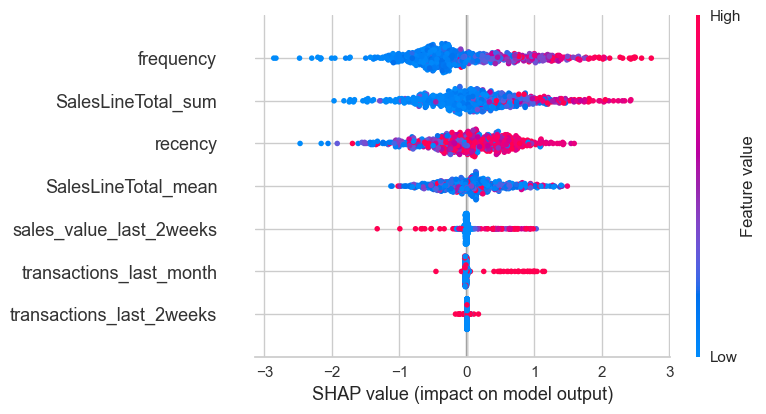

In [146]:
clf.interpret_model(xgb_clf_model)

### Business value 
#### What would happen if you could increase revenue just by 10%

In [147]:
reg_predictions_df\
['prediction_label']\
.sum()

2496664.8

In [148]:
2496664.8 * 0.10 * 4

998665.9199999999

#### It's easier than you think

In [156]:
top_20_customers = reg_predictions_df.head(20).index.to_list()

In [158]:
transactions_df = transactions_df.rename(columns={'Customer ID': 'Customer_ID'})
transactions_df.head()

Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate                Price          Customer_ID  \
0  2009-12-01 07:45:00                 6.95             13085.00   
1  2009-12-01 07:45:00                 6.75             13085.00   
2  2009-12-01 07:45:00                 6.75             13085.00   
3  2009-12-01 07:45:00                 2.10             13085.00   
4  2009-12-01 07:45:00                 1.25             13085.00   

          Country       SalesLineTotal  
0  United Kingdom                83.40  
1  United Kingdom                81.00  
2  United Kingdom                81.00  
3  United Kingdom               100.80  
4  United Kingdom                30.00

#### *Increase* *FREQUENCY* of purchases: sell them these 

In [159]:
transactions_df \
    .query('Customer_ID in @top_20_customers')\
    .groupby('Description')\
    .size()\
    .to_frame()\
    .set_axis(['count'], axis= 1)\
    .sort_values('count', ascending = False)


count
Description                               
WHITE HANGING HEART T-LIGHT HOLDER     194
WOODEN FRAME ANTIQUE WHITE             157
REGENCY CAKESTAND 3 TIER               147
WOODEN PICTURE FRAME WHITE FINISH      144
WOOD S/3 CABINET ANT WHITE FINISH      136
...                                    ...
ETCHED GLASS DROPLET DECORATION          1
ETCHED GLASS COASTER                     1
ETCHED GLASS BIRD TREE DECORATION        1
ENVELOPE 50 ROMANTIC IMAGES              1
  DOORMAT UNION JACK GUNS AND ROSES      1

[2745 rows x 1 columns]

#### *Increase* *SIZE* of purchases: sell them these 

In [162]:
transactions_df \
    [['Customer_ID','Description','SalesLineTotal']]\
    .query('Customer_ID in @top_20_customers')\
    .groupby('Description')\
    .sum()\
    .sort_values('SalesLineTotal', ascending = False)


Customer_ID       SalesLineTotal
Description                                                                  
REGENCY CAKESTAND 3 TIER                      2175630.00             54209.85
ROTATING SILVER ANGELS T-LIGHT HLDR            225986.00             29764.20
WHITE HANGING HEART T-LIGHT HOLDER            3078384.00             25621.32
ASSORTED COLOUR BIRD ORNAMENT                 1393873.00             24556.00
VINTAGE UNION JACK MEMOBOARD                   389795.00             21769.89
...                                                  ...                  ...
CUTE CATS TAPE                                  14646.00                 1.30
RED RETROSPOT TAPE                              14646.00                 1.30
STARS GIFT TAPE                                 14646.00                 1.30
BLACK LOVE BIRD CANDLE                          15061.00                 1.25
PADS TO MATCH ALL CUSHIONS                      16705.00                 0.00

[2745 rows x 2 columns]

# Key business insights 
## 1. Increasing CLV 90-Day Sales Value - If we want to increase sales value, we should focus on the customers with the highest historical sales value and get them to spend more ( i.e. SalesLineTotal)

In [163]:
reg_predictions_df

recency  frequency   SalesLineTotal_sum  SalesLineTotal_mean  \
Customer_ID                                                                 
18102.00         -10        567            269041.66               474.50   
14646.00          -3       1130            168420.66               149.04   
14911.00          -2       3296             77993.53                23.66   
16684.00         -22        162             38634.92               238.49   
14156.00          -4       1783            151897.02                85.19   
...              ...        ...                  ...                  ...   
15627.00          -2         24               566.90                23.62   
17369.00           0          1               979.20               979.20   
13734.00         -53         28              6701.64               239.34   
15094.00          -8          5                83.00                16.60   
12980.00          -1         22              5922.48               269.20   

             transactions_last_month  transactions_last_2weeks  \
Customer_ID                                                      
18102.00                        4.00                      1.00   
14646.00                        5.00                      3.00   
14911.00                       15.00                      6.00   
16684.00                        3.00                      0.00   
14156.00                        7.00                      1.00   
...                              ...                       ...   
15627.00                        1.00                      1.00   
17369.00                        1.00                      1.00   
13734.00                        0.00                      0.00   
15094.00                        1.00                      1.00   
12980.00                        1.00                      1.00   

             sales_value_last_2weeks        sales_90_flag  \
Customer_ID                                                 
18102.00                        2.00                 1.00   
14646.00                       40.00                 1.00   
14911.00                      137.00                 1.00   
16684.00                        0.00                 1.00   
14156.00                       12.00                 1.00   
...                              ...                  ...   
15627.00                        9.00                 0.00   
17369.00                        1.00                 0.00   
13734.00                        0.00                 0.00   
15094.00                        2.00                 0.00   
12980.00                        2.00                 1.00   

                  sales_90_value     prediction_label  
Customer_ID                                            
18102.00                80122.68             80116.29  
14646.00                79192.85             78978.28  
14911.00                62385.36             62327.92  
16684.00                41854.29             41884.74  
14156.00                34951.98             34958.10  
...                          ...                  ...  
15627.00                    0.00               -90.56  
17369.00                    0.00               -95.09  
13734.00                    0.00              -105.19  
15094.00                    0.00              -108.89  
12980.00                 2948.40              -188.85  

[3355 rows x 10 columns]

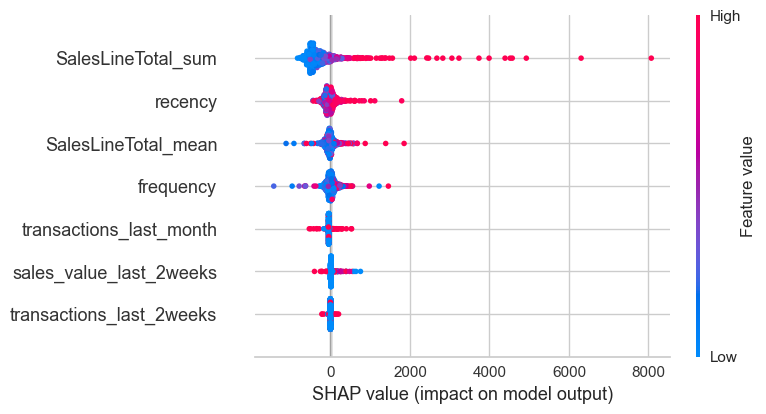

In [164]:
reg.interpret_model(xgb_reg_model)

## 2. Increasing CLV 90-Day Sales Probability - If we want to increase the probability of a customer making a purchase in the next 90 days, we should focus on the customers with the highest frequency and and ensure they keep buying.

In [165]:
clf_predictions_df

recency  frequency   SalesLineTotal_sum  SalesLineTotal_mean  \
Customer_ID                                                                 
13408.00          -1        287             18028.52                62.82   
15260.00          -7        274              5317.05                19.41   
15498.00          -9        279              8113.94                29.08   
13798.00           0        269             27622.46               102.69   
14156.00          -4       1783            151897.02                85.19   
...              ...        ...                  ...                  ...   
13217.00        -200          1               132.50               132.50   
13498.00        -275         17               327.38                19.26   
17715.00        -137          1               163.20               163.20   
16443.00         -65          1               162.24               162.24   
18273.00        -135          1               153.00               153.00   

             transactions_last_month  transactions_last_2weeks  \
Customer_ID                                                      
13408.00                        3.00                      2.00   
15260.00                        2.00                      1.00   
15498.00                        2.00                      1.00   
13798.00                        4.00                      2.00   
14156.00                        7.00                      1.00   
...                              ...                       ...   
13217.00                        0.00                      0.00   
13498.00                        0.00                      0.00   
17715.00                        0.00                      0.00   
16443.00                        0.00                      0.00   
18273.00                        0.00                      0.00   

             sales_value_last_2weeks       sales_90_value  \
Customer_ID                                                 
13408.00                       10.00              5587.90   
15260.00                       15.00              2060.41   
15498.00                        5.00              4609.24   
13798.00                       10.00             11060.56   
14156.00                       12.00             34951.98   
...                              ...                  ...   
13217.00                        0.00                 0.00   
13498.00                        0.00                 0.00   
17715.00                        0.00                 0.00   
16443.00                        0.00                 0.00   
18273.00                        0.00                 0.00   

                   sales_90_flag  prediction_label   prediction_score_0  \
Customer_ID                                                               
13408.00                    1.00                 1                 0.00   
15260.00                    1.00                 1                 0.00   
15498.00                    1.00                 1                 0.00   
13798.00                    1.00                 1                 0.00   
14156.00                    1.00                 1                 0.00   
...                          ...               ...                  ...   
13217.00                    0.00                 0                 0.99   
13498.00                    0.00                 0                 0.99   
17715.00                    0.00                 0                 0.99   
16443.00                    0.00                 0                 0.99   
18273.00                    0.00                 0                 0.99   

              prediction_score_1  
Customer_ID                       
13408.00                    1.00  
15260.00                    1.00  
15498.00                    1.00  
13798.00                    1.00  
14156.00                    1.00  
...                          ...  
13217.00                    0.01  
13498.00                    0.01  
17715.00                    0.01

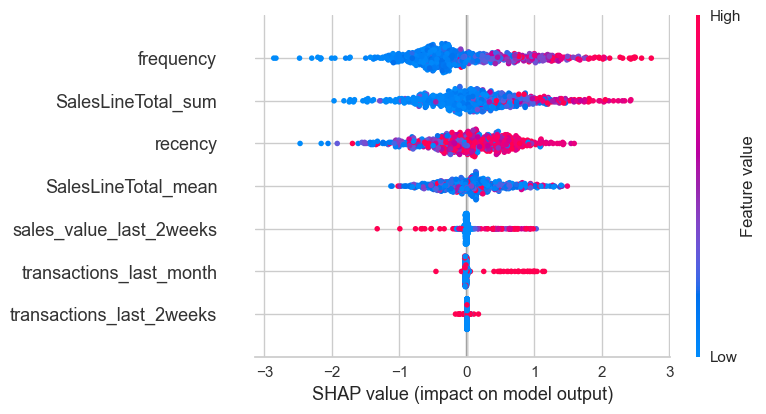

In [166]:
clf.interpret_model(xgb_clf_model)

In [167]:
reg_predictions_df.to_csv('data/reg_predictions_df.csv')

In [168]:
clf_predictions_df.to_csv('data/clf_predictions_df.csv')

## 3. Amalgamated Insights 

- 1. Now we know how much we can spend to target these customers in the next 3 months
- 2. The regression models tells us how much they are going to spend, and the classification model tells us me whether or not they are falling off or churning over the next 90 days.
- 3. We now also know what relationships exist between the features and the lifetime value of a customer and also the probability of a customer making a purchase over the next 90 days and therefore, we can confidently improve the business.



# CLV for each Cluster
- Further Looking into CLV over the next 90 days for Each Cluster 

In [127]:
df_seg = pd.read_csv('data/full_clustering_data.csv')
df_seg

Customer ID  MonetaryValue  Frequency      LastInvoiceDate  Recency  \
0         12346.0         169.36          2  2010-06-28 13:53:00      164   
1         12347.0        1323.32          2  2010-12-07 14:57:00        2   
2         12348.0         221.16          1  2010-09-27 14:59:00       73   
3         12349.0        2221.14          2  2010-10-28 08:23:00       42   
4         12351.0         300.93          1  2010-11-29 15:23:00       10   
...           ...            ...        ...                  ...      ...   
4280      18223.0        7516.31         12  2010-11-17 12:20:00       22   
4281      18225.0        7545.14         15  2010-12-09 15:46:00        0   
4282      18226.0        6650.83         15  2010-11-26 15:51:00       13   
4283      18231.0        4791.80         23  2010-10-29 14:17:00       41   
4284      18260.0        7318.91         17  2010-11-30 12:25:00        9   

      Cluster ClusterLabel  
0           0       RETAIN  
1           3       REWARD  
2           2      NURTURE  
3           3       REWARD  
4           2      NURTURE  
...       ...          ...  
4280       -3      DELIGHT  
4281       -3      DELIGHT  
4282       -3      DELIGHT  
4283       -3      DELIGHT  
4284       -3      DELIGHT  

[4285 rows x 7 columns]

In [129]:
df_clean = pd.read_csv('data/cleaned_df.csv')
df_clean

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
406304   538171     22271                 FELTCRAFT DOLL ROSIE         2   
406305   538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
406306   538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
406307   538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
406308   538171     21931               JUMBO STORAGE BAG SUKI         2   

                InvoiceDate  Price  Customer ID         Country  \
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom   
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom   
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom   
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom   
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom   
...                     ...    ...          ...             ...   
406304  2010-12-09 20:01:00   2.95      17530.0  United Kingdom   
406305  2010-12-09 20:01:00   3.75      17530.0  United Kingdom   
406306  2010-12-09 20:01:00   3.75      17530.0  United Kingdom   
406307  2010-12-09 20:01:00   3.75      17530.0  United Kingdom   
406308  2010-12-09 20:01:00   1.95      17530.0  United Kingdom   

        SalesLineTotal  
0                83.40  
1                81.00  
2                81.00  
3               100.80  
4                30.00  
...                ...  
406304            5.90  
406305            3.75  
406306            3.75  
406307            7.50  
406308            3.90  

[406309 rows x 9 columns]

In [130]:
# Create an empty dictionary to hold DataFrames for each cluster
cluster_dfs = {}

# Loop through each unique cluster in the first DataFrame
for cluster in df_seg['Cluster'].unique():
    # Get Customer IDs for the current cluster
    customer_ids = df_seg[df_seg['Cluster'] == cluster]['Customer ID'].tolist()
    
    # Filter the second DataFrame for these Customer IDs
    df_filtered = df_clean[df_clean['Customer ID'].isin(customer_ids)]
    
    # Store the filtered DataFrame in the dictionary with cluster name as key
    cluster_dfs[cluster] = df_filtered

# Example: To access the DataFrame for a specific cluster, e.g., cluster 0
print("Cluster 0 DataFrame:")
print(cluster_dfs[0])

Cluster 0 DataFrame:
        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
203782   515333     90041      PEARL AND CHERRY QUARTZ BRACLET         1   
203783   515333     21540               DAIRY MAID BUTTER DISH         1   
203784   515333     21535         RED RETROSPOT SMALL MILK JUG         1   
203785   515333    84849A        HELLO SAILOR BLUE SOAP HOLDER         1   
203786   515333    17107D  FLOWER FAIRY,5 SUMMER B'DRAW LINERS         4   

                InvoiceDate  Price  Customer ID         Country  \

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Cluster  0


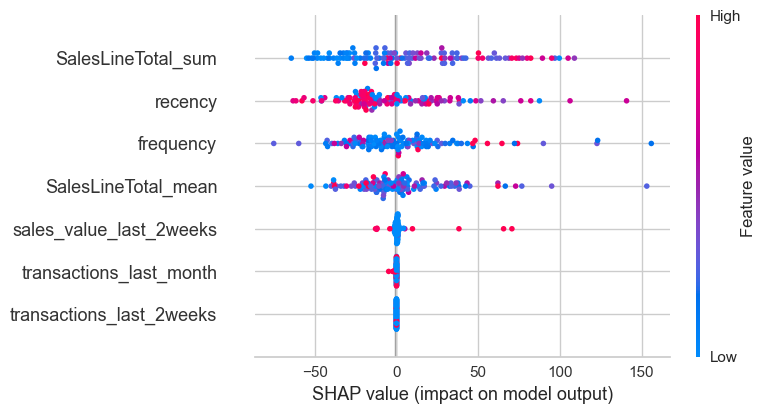

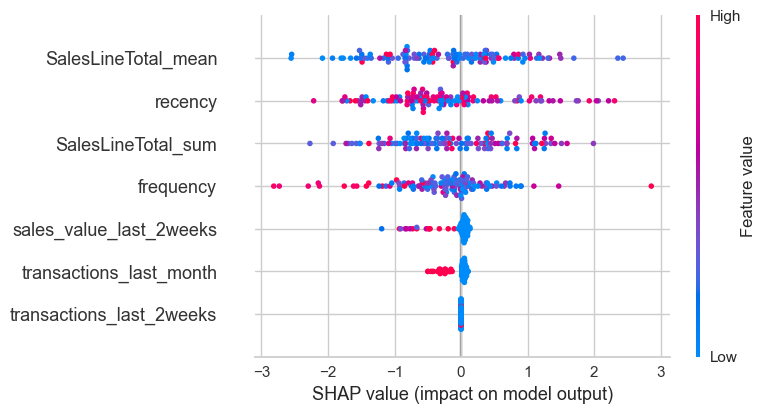

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Cluster  3


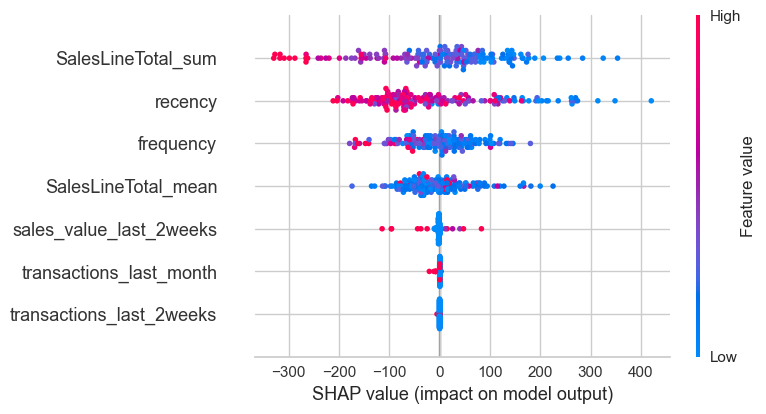

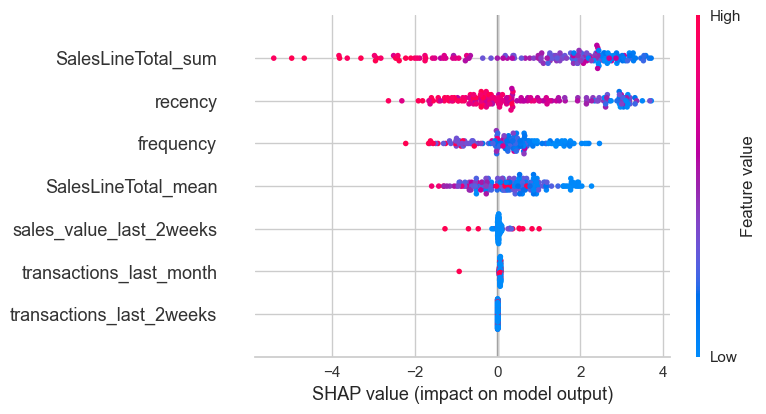

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Cluster  2


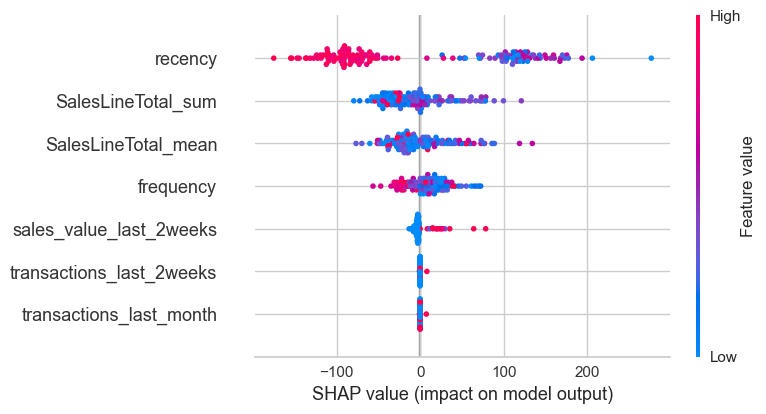

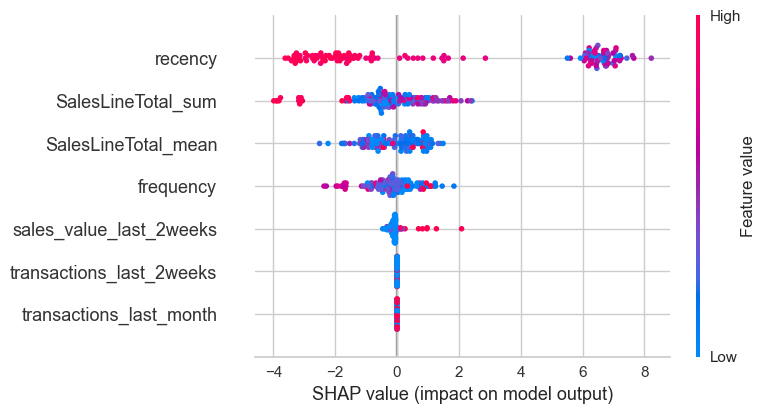

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Cluster  1


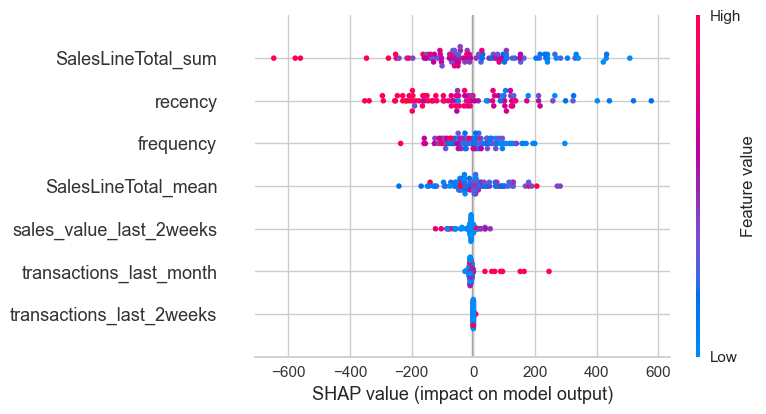

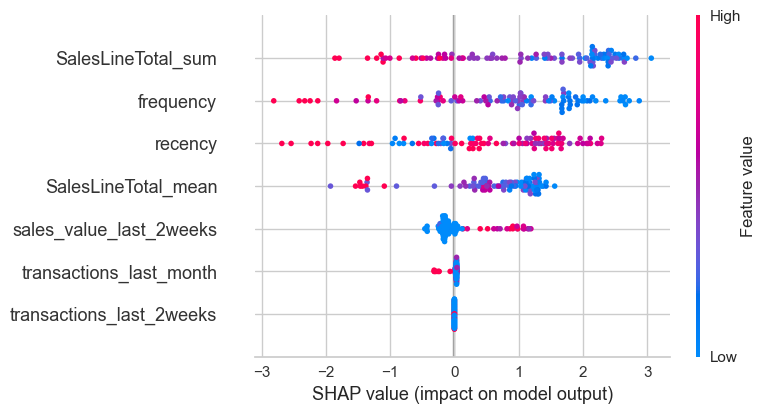

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Cluster  -1


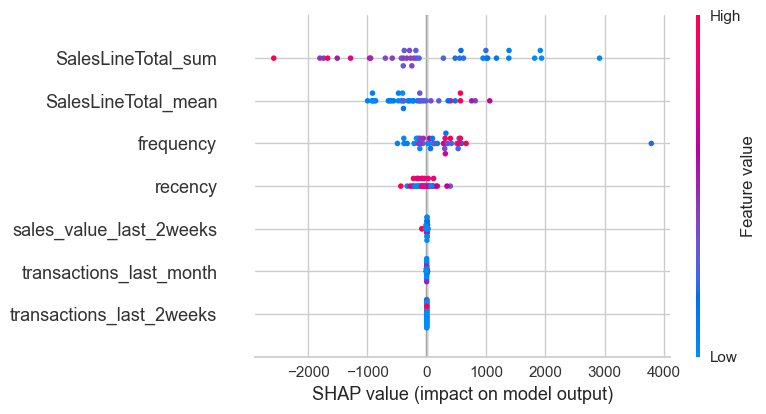

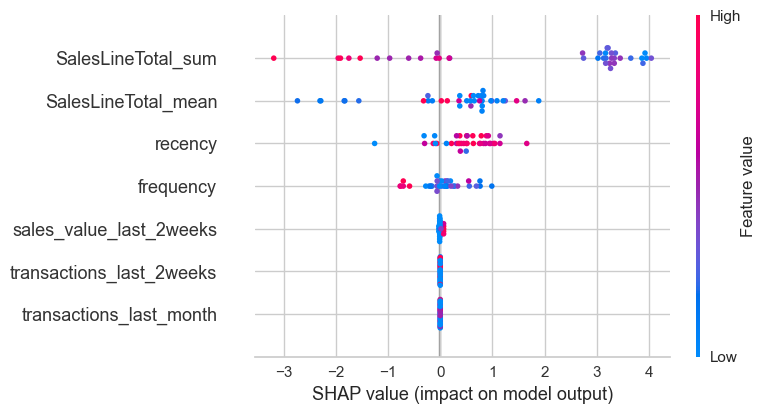

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Cluster  -2


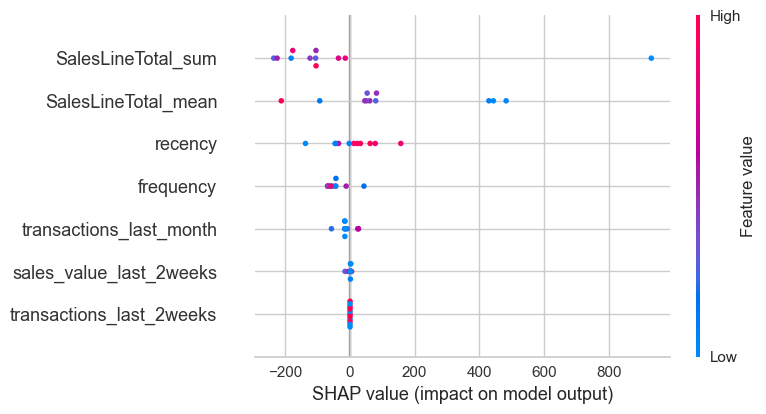

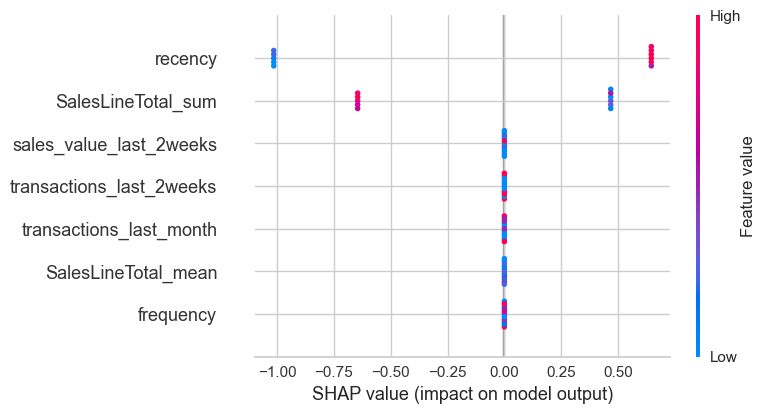

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Cluster  -3


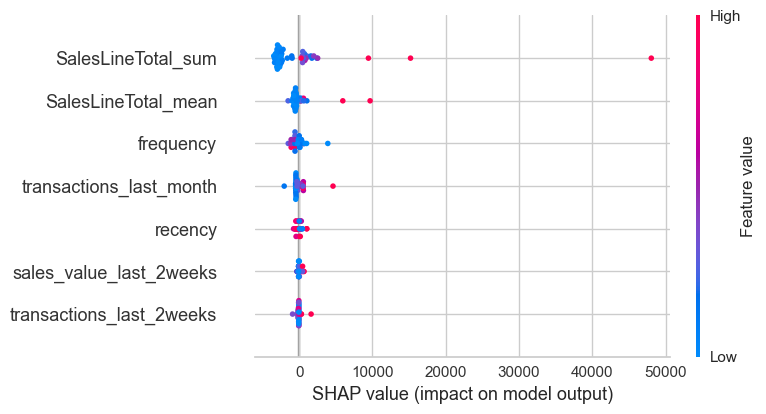

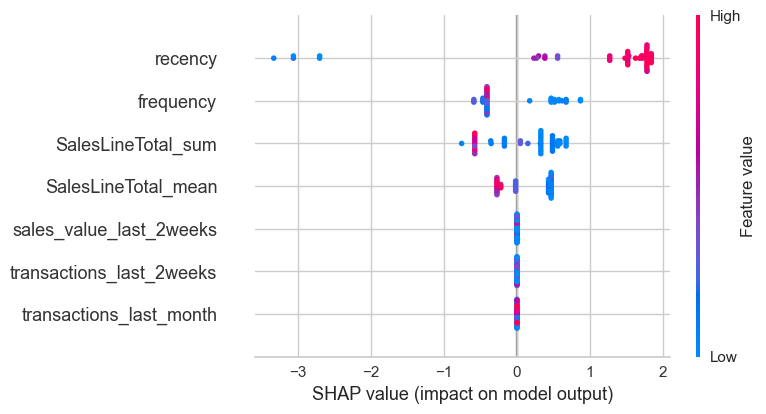

In [138]:
# Doing for all Clusters
for key in cluster_dfs:
    df= cluster_dfs[key]
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df = df.rename(columns={'Customer ID': 'Customer_ID'})
    n_days = 90
    max_date = df['InvoiceDate'].max()
    cutoff = max_date - pd.to_timedelta(n_days, unit = "d")
    temporal_in_df = df[df['InvoiceDate']<cutoff]
    temporal_out_df = df[df['InvoiceDate'] >= cutoff] \
    .query('Customer_ID in @temporal_in_df.Customer_ID')
    targets_df = temporal_out_df[['Customer_ID','InvoiceDate','SalesLineTotal']]\
    .groupby('Customer_ID')\
    .sum()\
    .rename({'SalesLineTotal':'sales_90_value'}, axis=1) \
    .assign(sales_90_flag = 1)
    max_date = temporal_in_df['InvoiceDate'].max()
    recency_features_df = temporal_in_df \
    [['Customer_ID','InvoiceDate']] \
    .groupby('Customer_ID') \
    .apply(
        lambda x: int((x['InvoiceDate'].max() - max_date) / pd.to_timedelta(1,"day"))
    ) \
    .to_frame() \
    .set_axis(["recency"],axis=1)

    frequency_features_df = temporal_in_df \
    [['Customer_ID','InvoiceDate']]\
    .groupby('Customer_ID')\
    .count()\
    .set_axis(['frequency'],axis=1)

    monetary_features_df = temporal_in_df \
    .groupby('Customer_ID')\
    .aggregate(
        {
            'SalesLineTotal':['sum','mean']
        }
    )\
    .set_axis(['SalesLineTotal_sum','SalesLineTotal_mean'],axis = 1)
    
    cutoff_28d = cutoff - pd.to_timedelta(28, unit ="d")

    transactions_last_month_df = temporal_in_df[['Customer_ID','InvoiceDate']]\
    .drop_duplicates()\
    .query('InvoiceDate >= @cutoff_28d')\
    .groupby('Customer_ID')\
    .size()\
    .to_frame()\
    .set_axis(['transactions_last_month'], axis = 1)

    cutoff_14d = cutoff - pd.to_timedelta(14, unit ="d")

    transactions_last_2weeks_df = temporal_in_df[['Customer_ID','InvoiceDate']]\
        .drop_duplicates()\
        .query('InvoiceDate >= @cutoff_14d')\
        .groupby('Customer_ID')\
        .size()\
        .to_frame()\
        .set_axis(['transactions_last_2weeks'], axis = 1)

    cutoff_14d = cutoff - pd.to_timedelta(14, unit ="d")

    sales_last_2weeks_df = temporal_in_df[['Customer_ID','InvoiceDate','SalesLineTotal']]\
        .drop_duplicates()\
        .query('InvoiceDate >= @cutoff_14d')\
        .groupby('Customer_ID')\
        .size()\
        .to_frame()\
        .set_axis(['sales_value_last_2weeks'], axis = 1)

    features_df = pd.concat(
    [recency_features_df, frequency_features_df,
     monetary_features_df, transactions_last_month_df,
     transactions_last_2weeks_df, sales_last_2weeks_df], axis=1
    )\
        .merge(
            targets_df,
            left_index=True,
            right_index=True,
            how='left'
        )\
        .fillna(0)

    reg_setup = reg.setup(
        data = features_df.drop('sales_90_flag', axis = 1),
        target = 'sales_90_value',
        train_size = 0.8,
        normalize = True,
        session_id = 123,
        verbose = True,
        log_experiment = False
    )

    xgb_reg_model = reg.create_model('xgboost')

    reg_predictions_df = reg.predict_model(xgb_reg_model, data = features_df)\
                        .sort_values('prediction_label', ascending=False)

    clf_setup = clf.setup(
        data = features_df.drop('sales_90_value', axis = 1),
        target = 'sales_90_flag',
        train_size = 0.8,
        normalize = True,
        session_id = 123,
        verbose = True,
        log_experiment = False
    )

    xgb_clf_model = clf.create_model('xgboost')

    clf_predictions_df = clf.predict_model(xgb_clf_model, data = features_df, raw_score = True)\
                        .sort_values('prediction_score_1', ascending=False)
    print('Cluster ',key)
    reg.interpret_model(xgb_reg_model)
    clf.interpret_model(xgb_clf_model)
    reg_predictions_df.to_csv(f'data/reg_predictions_{key}_df.csv')
    clf_predictions_df.to_csv(f'data/clf_predictions_{key}_df.csv')

# Final business insights for each Cluster

## We now know the CLV 90-Day Sales Value of Customers in Each Cluster and how much can be spent to target them
## We also know the probability of a customer making a purchase in the next 90 days
## We aslo know the relationships between the features and the lifetime value of a customer

## Cluster 0: "Retain"
- 1. Increasing CLV 90-Day Sales Value - If we want to increase sales value, we should focus on the customers with the highest historical total sales value and get them to spend more ( i.e. SalesLineTotal_sum)

- 2. Increasing CLV 90-Day Sales Probability - If we want to increase the probability of a customer making a purchase in the next 90 days, we should focus on the customers with the highest historical mean sales value and ensure they keep buying. (i.e. SalesLineTotal_mean)
 
## Cluster 1 "Re-Engage":
- 1. Increasing CLV 90-Day Sales Value - If we want to increase sales value, we should focus on the customers with the highest historical total sales value and get them to spend more ( i.e. SalesLineTotal_sum)

- 2. Increasing CLV 90-Day Sales Probability - If we want to increase the probability of a customer making a purchase in the next 90 days, we should focus on the customers with the highest historical total sales value and get them to keep buying. ( i.e. SalesLineTotal_sum)

## Cluster 2 "Nurture":
- 1. Increasing CLV 90-Day Sales Value - If we want to increase sales value, we should focus on the customers with the highest recency and get them to spend more ( i.e. recency)

- 2. Increasing CLV 90-Day Sales Probability - If we want to increase the probability of a customer making a purchase in the next 90 days, we should focus on the customers with the highest recency and ensure they keep buying. (i.e. recency)
 
## Cluster 3 "Reward":
- 1. Increasing CLV 90-Day Sales Value - If we want to increase sales value, we should focus on the customers with the highest historical total sales value and get them to spend more ( i.e. SalesLineTotal_sum)

- 2. Increasing CLV 90-Day Sales Probability - If we want to increase the probability of a customer making a purchase in the next 90 days, we should focus on the customers with the highest historical total sales value and get them to keep buying. ( i.e. SalesLineTotal_sum)


## Cluster -1 (Monetary Outliers) "PAMPER":
- 1. Increasing CLV 90-Day Sales Value - If we want to increase sales value, we should focus on the customers with the highest recency and get them to spend more ( i.e. recency)

- 2. Increasing CLV 90-Day Sales Probability - If we want to increase the probability of a customer making a purchase in the next 90 days, we should focus on the customers with the highest recency and ensure they keep buying. (i.e. recency)

## Cluster -2 (Frequency Outliers) "UPSELL":
- 1. Increasing CLV 90-Day Sales Value - If we want to increase sales value, we should focus on the customers with the highest historical total sales value and get them to spend more ( i.e. SalesLineTotal_sum)

- 2. Increasing CLV 90-Day Sales Probability - If we want to increase the probability of a customer making a purchase in the next 90 days, we should focus on the customers with the highest recency and ensure they keep buying. (i.e. recency)

## Cluster -3 (Monetary & Frequency Outliers) "DELIGHT":
- 1. Increasing CLV 90-Day Sales Value - If we want to increase sales value, we should focus on the customers with the highest historical total sales value and get them to spend more ( i.e. SalesLineTotal_sum)

- 2. Increasing CLV 90-Day Sales Probability - If we want to increase the probability of a customer making a purchase in the next 90 days, we should focus on the customers with the highest recency and ensure they keep buying. (i.e. recency)


# Conclusion
- This project successfully executed customer segmentation using RFM (Recency, Frequency, Monetary) analysis, effectively categorizing customers into distinct clusters based on their purchasing behaviors. By calculating Customer Lifetime Value (CLV) through three different methods—aggregation, probabilistic modeling, and predictive CLV models—insights into the projected revenue from each cluster over the next 90 days were obtained.

- These findings provide a clear indication of how much can be invested in targeted marketing efforts for these customers in the upcoming three months. Additionally, the analysis reveals the relationships between various features and customer lifetime value, enabling the formulation of informed strategies for enhancing customer engagement and retention.

- With these insights, opportunities for personalized marketing campaigns and product recommendations can be identified, paving the way for improved customer loyalty and increased business profitability.